In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


#Import Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB #Use for testing for now
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

#Import ARIMA model for trend analysis
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import matplotlib.dates as mdates

#Import Clustering Models
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

#Import Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score

#Import Preprocessing
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN


import random



In [3]:
loanFraud_dataset = pd.read_csv('account_data.csv')
creditcard_dataset = pd.read_csv('BankChurners.csv')

In [4]:
loanFraud_dataset.head(5)

,Age,Occupation,MaritalStatus,Dependents,ResidentialStatus,AddressDuration,CreditScore,IncomeLevel,LoanAmountRequested,LoanTerm,...,AccountActivity,PaymentBehavior,Blacklists,EmploymentVerification,PastFinancialMalpractices,DeviceInformation,SocialMediaFootprint,ConsistencyinData,Referral,IsFraud
0,56,Teacher,Divorced,4,Own,1,827,52033,300000,25,...,Normal,On-time,No,Verified,No,Tablet,Yes,Consistent,Referral,No
1,40,Engineer,Single,0,Rent,1,830,42893,8105,3,...,Normal,On-time,No,Verified,No,Laptop,No,Consistent,Online,No
2,25,Clerk,Married,0,Live with Parents,360,809,141233,75734,19,...,Normal,On-time,Yes,Verified,No,Laptop,No,Consistent,Referral,No
3,34,Unemployed,Single,0,Rent,92,630,9217,2000,1,...,Unusual,Defaulted,No,Not Verified,Yes,Mobile,No,Inconsistent,Online,Yes
4,47,Software Developer,Single,0,Rent,26,733,47979,67767,1,...,Normal,On-time,No,Verified,No,Laptop,No,Consistent,Online,No


In [5]:
creditcard_dataset.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
loanFraud_dataset = loanFraud_dataset.dropna()


In [7]:
loanFraud_dataset.isnull().sum()

Age                          0
Occupation                   0
MaritalStatus                0
Dependents                   0
ResidentialStatus            0
AddressDuration              0
CreditScore                  0
IncomeLevel                  0
LoanAmountRequested          0
LoanTerm                     0
PurposeoftheLoan             0
Collateral                   0
InterestRate                 0
PreviousLoans                0
ExistingLiabilities          0
ApplicationBehavior          0
LocationofApplication        0
ChangeinBehavior             0
TimeofTransaction            0
AccountActivity              0
PaymentBehavior              0
Blacklists                   0
EmploymentVerification       0
PastFinancialMalpractices    0
DeviceInformation            0
SocialMediaFootprint         0
ConsistencyinData            0
Referral                     0
IsFraud                      0
dtype: int64

In [8]:
loanFraud_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        10000 non-null  int64  
 1   Occupation                 10000 non-null  object 
 2   MaritalStatus              10000 non-null  object 
 3   Dependents                 10000 non-null  int64  
 4   ResidentialStatus          10000 non-null  object 
 5   AddressDuration            10000 non-null  int64  
 6   CreditScore                10000 non-null  int64  
 7   IncomeLevel                10000 non-null  int64  
 8   LoanAmountRequested        10000 non-null  int64  
 9   LoanTerm                   10000 non-null  int64  
 10  PurposeoftheLoan           10000 non-null  object 
 11  Collateral                 10000 non-null  object 
 12  InterestRate               10000 non-null  float64
 13  PreviousLoans              10000 non-null  int6

<h1>Data Visualisation for Loan Fraud</h1>

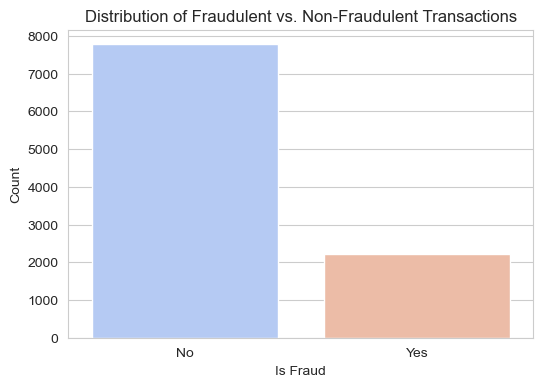

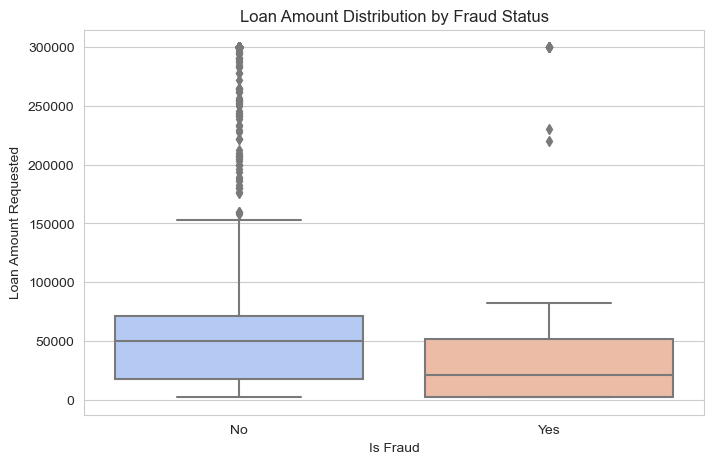

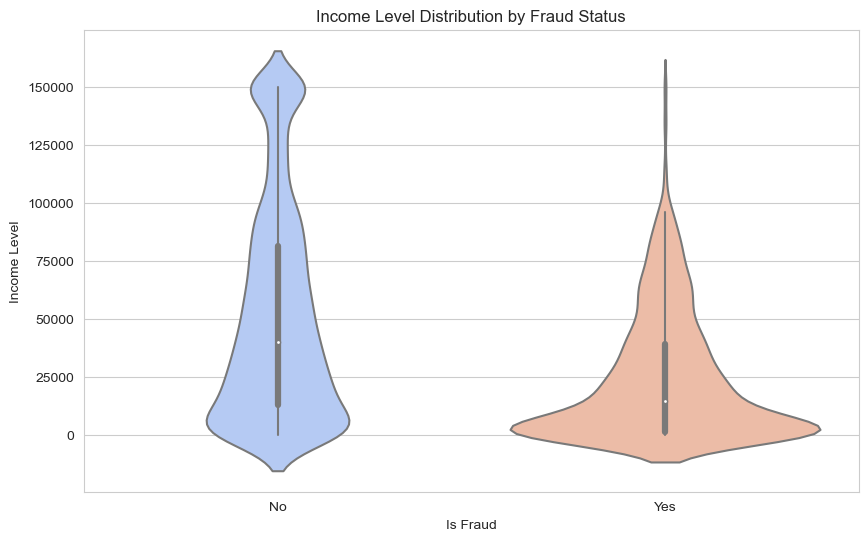

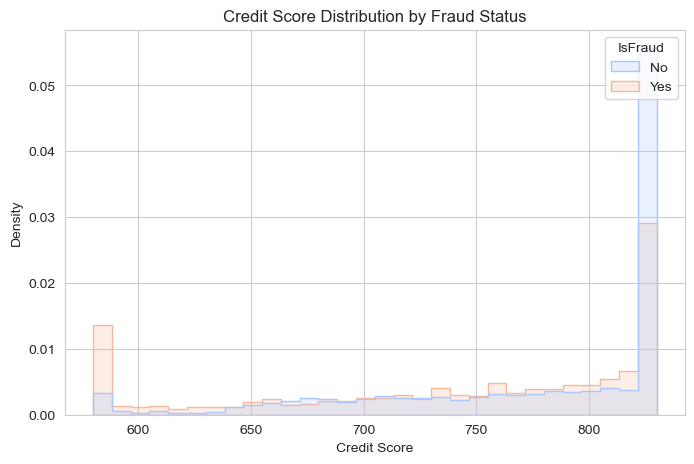

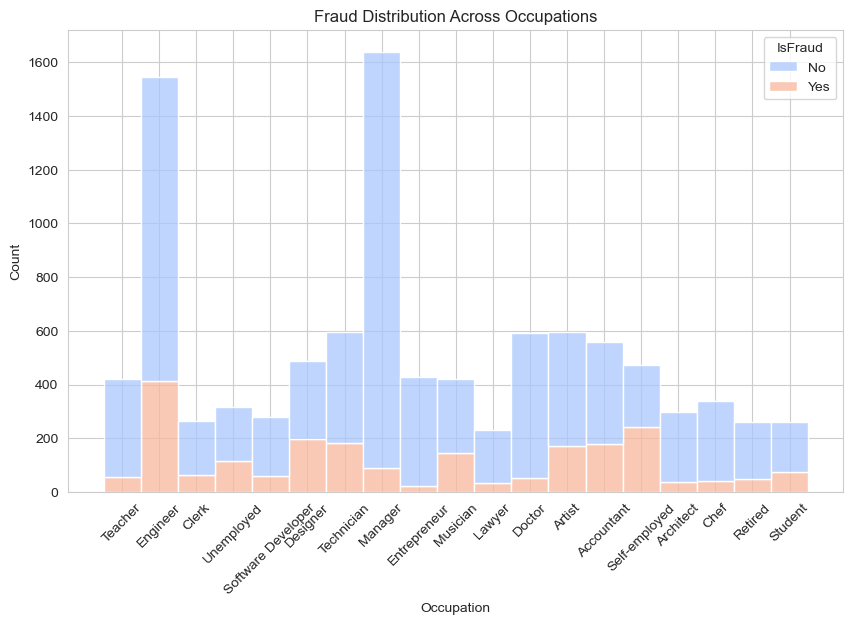

In [9]:
sns.set_style("whitegrid")

# fraud vs non-fraud
plt.figure(figsize=(6, 4))
sns.countplot(data=loanFraud_dataset, x='IsFraud', palette='coolwarm')
plt.title("Distribution of Fraudulent vs. Non-Fraudulent Transactions")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()

# loan amount distribution by fraud
plt.figure(figsize=(8, 5))
sns.boxplot(data=loanFraud_dataset, x='IsFraud', y='LoanAmountRequested', palette='coolwarm')
plt.title("Loan Amount Distribution by Fraud Status")
plt.xlabel("Is Fraud")
plt.ylabel("Loan Amount Requested")
plt.show()

# income vs fraud status
plt.figure(figsize=(10, 6))
sns.violinplot(data=loanFraud_dataset, x='IsFraud', y='IncomeLevel', palette='coolwarm')
plt.title("Income Level Distribution by Fraud Status")
plt.xlabel("Is Fraud")
plt.ylabel("Income Level")
plt.show()

# credit score vs fraud status
plt.figure(figsize=(8, 5))
sns.histplot(data=loanFraud_dataset, x='CreditScore', hue='IsFraud', element='step', stat='density', common_norm=False, palette='coolwarm', bins=30)
plt.title("Credit Score Distribution by Fraud Status")
plt.xlabel("Credit Score")
plt.ylabel("Density")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=loanFraud_dataset, x='Occupation', hue='IsFraud', multiple="stack", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Fraud Distribution Across Occupations")
plt.show()


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Dependents'}>,
        <Axes: title={'center': 'AddressDuration'}>],
       [<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'IncomeLevel'}>,
        <Axes: title={'center': 'LoanAmountRequested'}>],
       [<Axes: title={'center': 'LoanTerm'}>,
        <Axes: title={'center': 'InterestRate'}>,
        <Axes: title={'center': 'PreviousLoans'}>],
       [<Axes: title={'center': 'ExistingLiabilities'}>, <Axes: >,
        <Axes: >]], dtype=object)

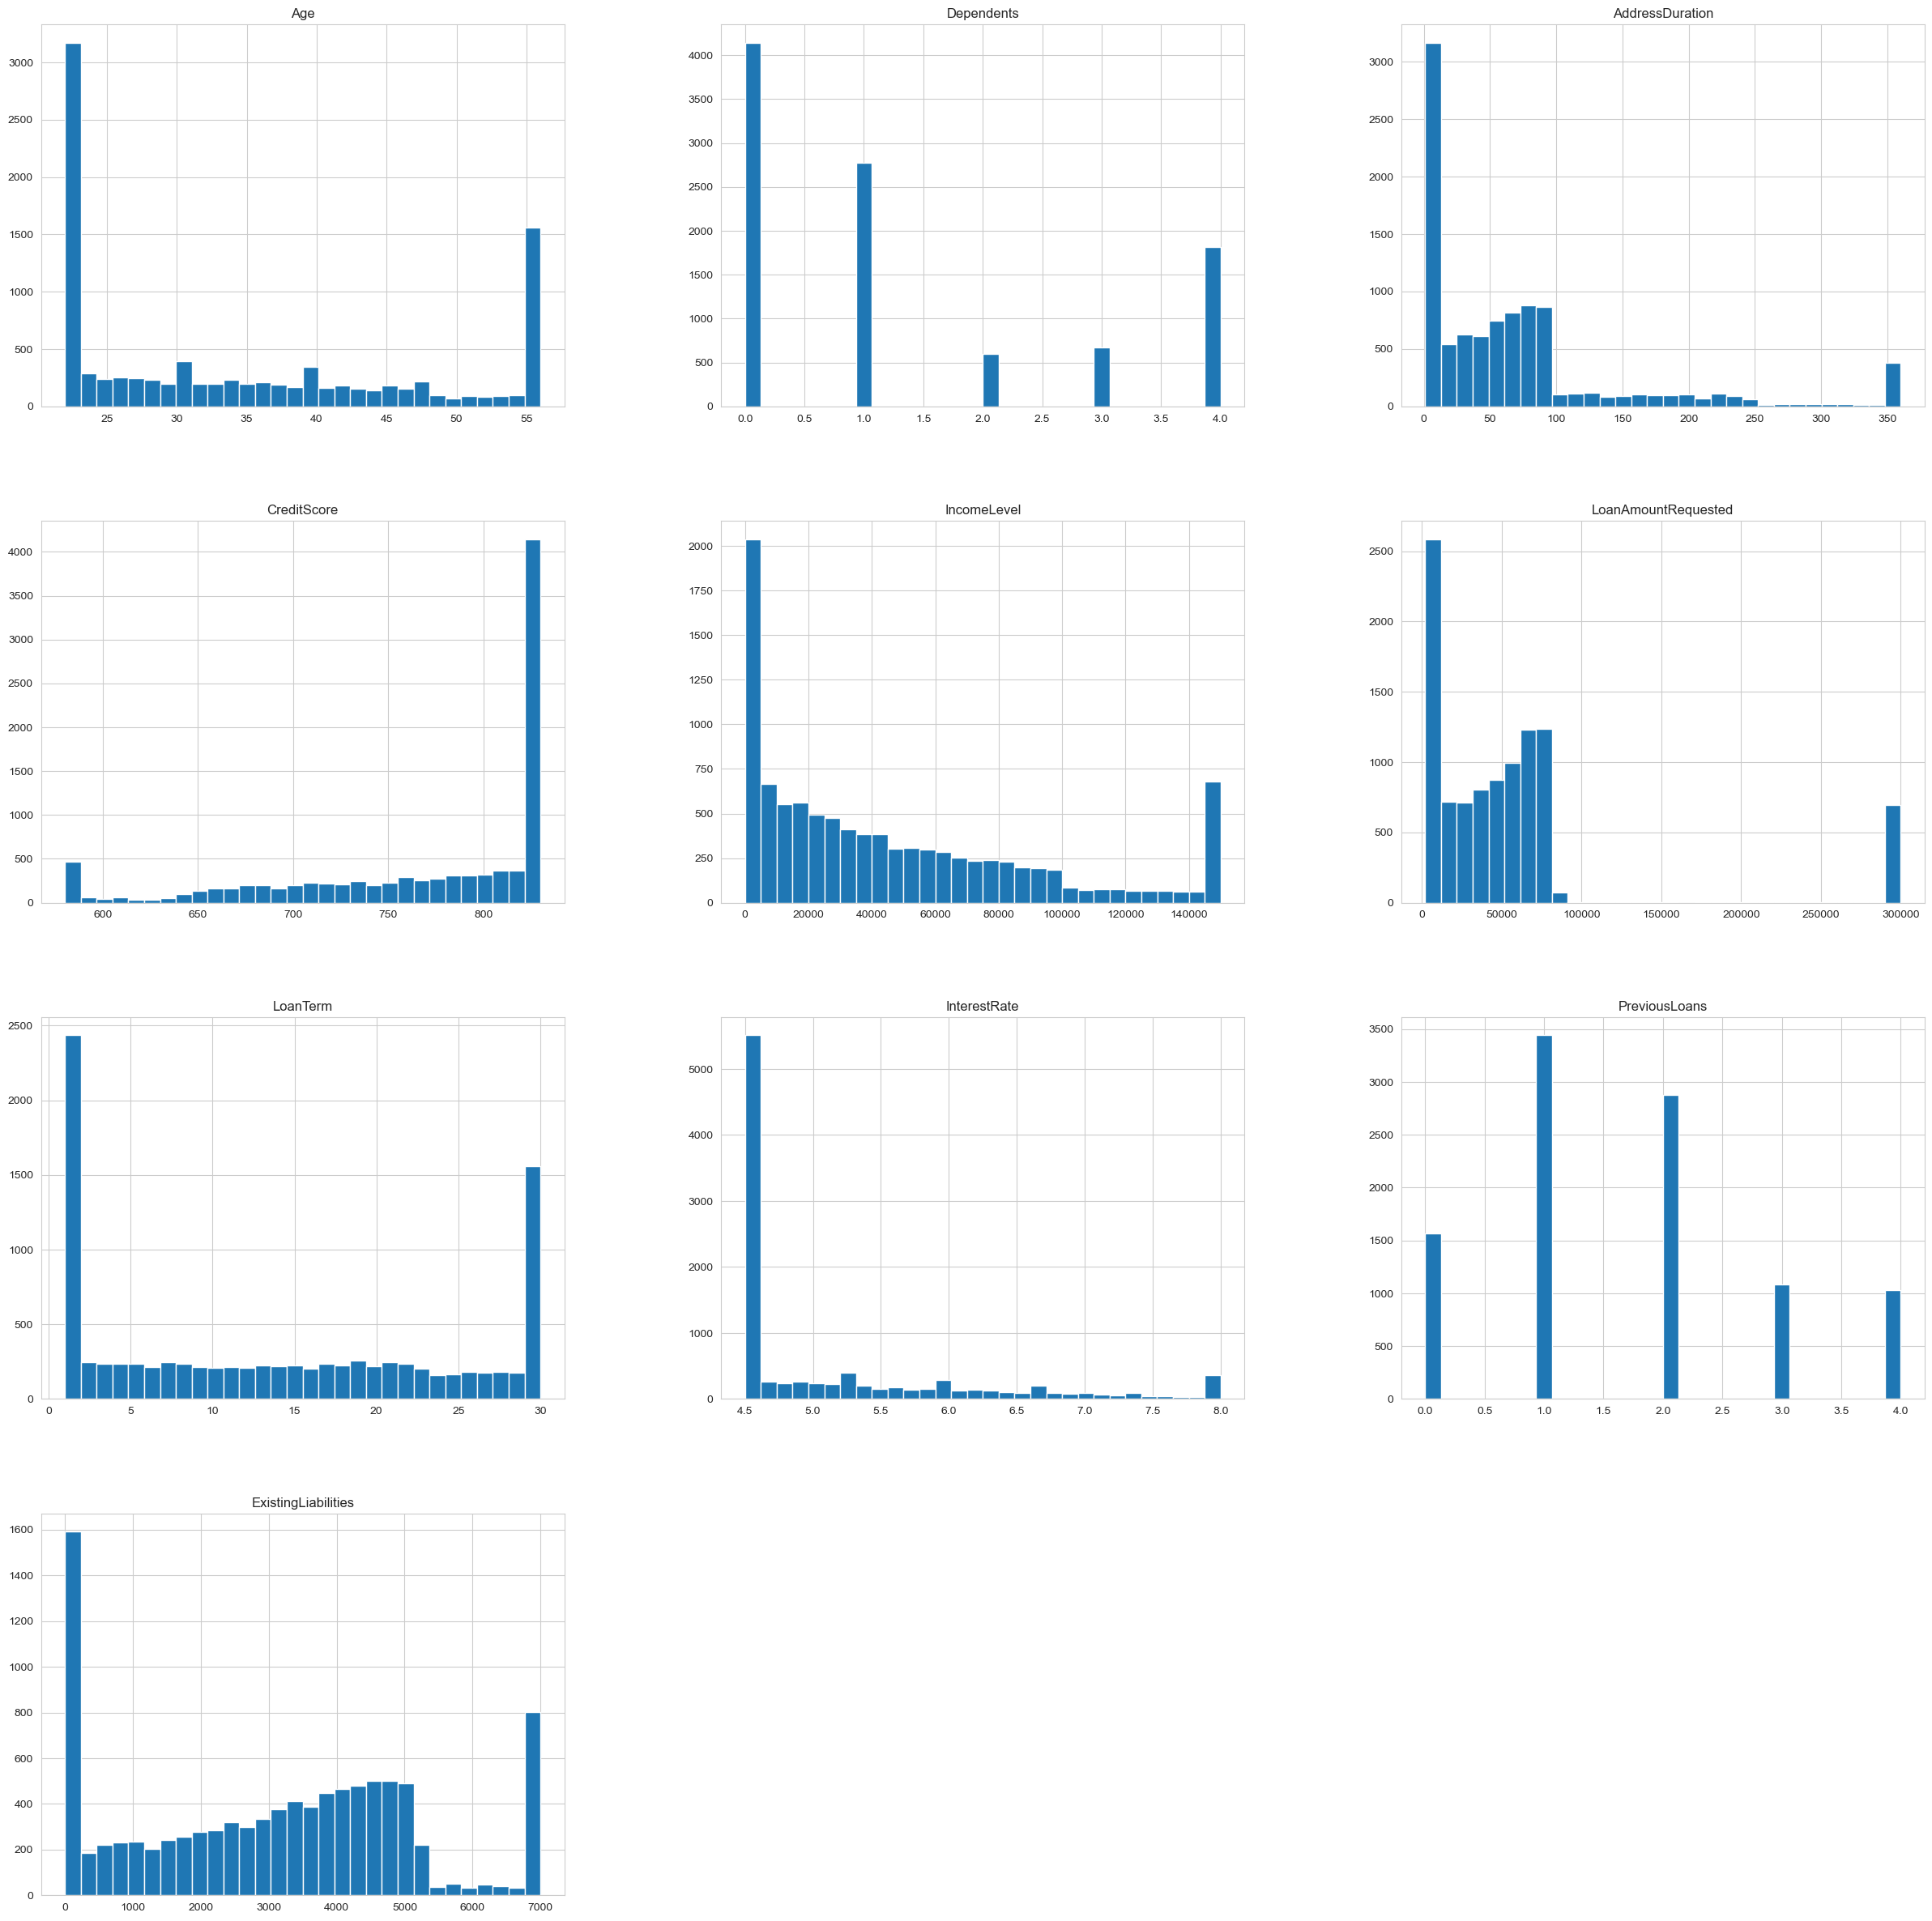

In [10]:
loanFraud_dataset.hist(bins=30, figsize=(30, 30))

<h1>Data Transformation for Loan Fraud</h1>

In [11]:
#Data Transformation for the account dataset

categorical_columns = loanFraud_dataset.select_dtypes(include=['object']).columns
exclude_column = 'TimeofTransaction'
categorical_columns = categorical_columns[categorical_columns != exclude_column]

#Transform the categorical columns into numerical values
label_encoders = {}
for column in categorical_columns:
    label_encoder = LabelEncoder()
    loanFraud_dataset[column] = label_encoder.fit_transform(loanFraud_dataset[column])
    label_encoders[column] = label_encoder

#Put values in a dictionary to compare and see what is the transformed value and original value
for column, encoder in label_encoders.items():
    print(f"\nMappings for {column}:")
    for original_value, encoded_value in zip(encoder.classes_, range(len(encoder.classes_))):
        print(f"{original_value} -> {encoded_value}")


Mappings for Occupation:
Accountant -> 0
Architect -> 1
Artist -> 2
Chef -> 3
Clerk -> 4
Designer -> 5
Doctor -> 6
Engineer -> 7
Entrepreneur -> 8
Lawyer -> 9
Manager -> 10
Musician -> 11
Retired -> 12
Self-employed -> 13
Software Developer -> 14
Student -> 15
Teacher -> 16
Technician -> 17
Unemployed -> 18

Mappings for MaritalStatus:
Divorced -> 0
Married -> 1
Single -> 2

Mappings for ResidentialStatus:
Live with Parents -> 0
Own -> 1
Rent -> 2

Mappings for PurposeoftheLoan:
auto -> 0
education -> 1
home -> 2
medical -> 3
personal -> 4
travel -> 5

Mappings for Collateral:
No -> 0
Yes -> 1

Mappings for ApplicationBehavior:
Normal -> 0
Rapid -> 1

Mappings for LocationofApplication:
Local -> 0
Unusual -> 1

Mappings for ChangeinBehavior:
No -> 0
Yes -> 1

Mappings for AccountActivity:
Normal -> 0
Unusual -> 1

Mappings for PaymentBehavior:
Defaulted -> 0
Late -> 1
On-time -> 2

Mappings for Blacklists:
No -> 0
Yes -> 1

Mappings for EmploymentVerification:
Not Verified -> 0
Verifi

<h5>One hot encoding code</h5>

In [12]:
# # Select categorical columns excluding 'TimeofTransaction' --> Too much fields to consider
# categorical_columns = loanFraud_dataset.select_dtypes(include=['object']).columns
# exclude_column = 'TimeofTransaction'
# categorical_columns = categorical_columns[categorical_columns != exclude_column]

# # Transform categorical columns
# one_hot_encoders = {}
# encoded_dfs = []

# for column in categorical_columns:
#     one_hot_encoder = OneHotEncoder(sparse=False, dtype=int)
#     transformed = one_hot_encoder.fit_transform(loanFraud_dataset[[column]])
    
#     # Store the encoder
#     one_hot_encoders[column] = one_hot_encoder
    
#     # Create a DataFrame for the encoded values
#     encoded_df = pd.DataFrame(
#         transformed,
#         columns=[f"{column}_{category}" for category in one_hot_encoder.categories_[0]]
#     )
#     encoded_dfs.append(encoded_df)

# # Combine the original dataset with the encoded columns
# loanFraud_dataset = pd.concat([loanFraud_dataset.drop(columns=categorical_columns), *encoded_dfs], axis=1)

# # Display mappings
# for column, encoder in one_hot_encoders.items():
#     print(f"\nMappings for {column}:")
#     for original_value, encoded_value in zip(encoder.categories_[0], range(len(encoder.categories_[0]))):
#         print(f"{original_value} -> One-hot encoded as {encoded_value}")

In [13]:
#Inspect individual column's value transformation (This is to print the transformed value and original value)

# specified_column = 'Cooking_With'

# if specified_column in label_encoders:
#     print(f"Mappings for {specified_column}:")
#     encoder = label_encoders[specified_column]
#     for original_value, encoded_value in zip(encoder.classes_, range(len(encoder.classes_))):
#         print(f"{original_value} -> {encoded_value}")
# else:
#     print(f"The column '{specified_column}' was not found or is not a categorical column.")

<h1>Fraud Trend Forecasting Loan Fraud</h1>

In [14]:
loanFraud_dataset['TimeofTransaction'] = pd.to_datetime(loanFraud_dataset['TimeofTransaction'])
loanFraud_dataset.set_index('TimeofTransaction', inplace=True)  # Set as index for time series analysis


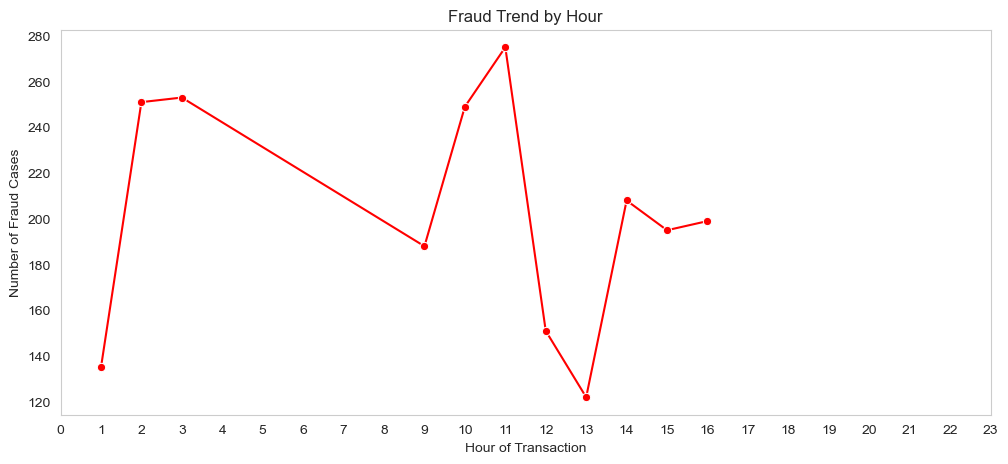

In [15]:
# Extract transaction hour
loanFraud_dataset['TransactionHour'] = loanFraud_dataset.index.hour  

# Count fraud cases per hour
fraud_by_hour = loanFraud_dataset.groupby('TransactionHour')['IsFraud'].sum()

# Plot fraud trend by hour
plt.figure(figsize=(12,5))
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values, marker='o', color='red')
plt.xlabel("Hour of Transaction")
plt.ylabel("Number of Fraud Cases")
plt.title("Fraud Trend by Hour")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

#Dataset only consist of records from a timing of 1am to 4pm

In [16]:
from itertools import cycle

# Define your date range
start_date = '2024-12-01'
end_date = '2025-03-02'  # Adjust as needed

# Calculate how many unique days we need
num_days = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days + 1

# Create an evenly distributed list of dates
# This will cycle through the date range if there are more records than days
all_dates = pd.date_range(start=start_date, periods=num_days).tolist()
date_cycle = cycle(all_dates)

# Assign a date to each row
loanFraud_dataset['BaseDate'] = [next(date_cycle) for _ in range(len(loanFraud_dataset))]

# Add the hour component
loanFraud_dataset['DummyDate'] = loanFraud_dataset['BaseDate'] + pd.to_timedelta(loanFraud_dataset['TransactionHour'], unit='h')

# Set DummyDate as index
loanFraud_dataset.set_index('DummyDate', inplace=True)

# Remove BaseDate column (since it's now redundant)
loanFraud_dataset.drop('BaseDate', axis=1, inplace=True)

# Display the first 5 rows
loanFraud_dataset.head(5)

loanFraud_dataset.head(5)

,Age,Occupation,MaritalStatus,Dependents,ResidentialStatus,AddressDuration,CreditScore,IncomeLevel,LoanAmountRequested,LoanTerm,...,PaymentBehavior,Blacklists,EmploymentVerification,PastFinancialMalpractices,DeviceInformation,SocialMediaFootprint,ConsistencyinData,Referral,IsFraud,TransactionHour
DummyDate,,,,,,,,,,,,,,,,,,,,,
2024-12-01 10:00:00,56,16,0,4,1,1,827,52033,300000,25,...,2,0,1,0,3,1,0,1,0,10
2024-12-02 16:00:00,40,7,2,0,2,1,830,42893,8105,3,...,2,0,1,0,1,0,0,0,0,16
2024-12-03 03:00:00,25,4,1,0,0,360,809,141233,75734,19,...,2,1,1,0,1,0,0,1,0,3
2024-12-04 16:00:00,34,18,2,0,2,92,630,9217,2000,1,...,0,0,0,1,2,0,1,0,1,16
2024-12-05 12:00:00,47,14,2,0,2,26,733,47979,67767,1,...,2,0,1,0,1,0,0,0,0,12


In [17]:
# Aggregate fraud cases per hour
fraud_trend = loanFraud_dataset.resample('D')['IsFraud'].sum()

auto_arima_model = auto_arima(fraud_trend, seasonal=False, trace=True)
print(auto_arima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=852.613, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=613.479, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=767.174, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=548.010, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=546.056, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=548.016, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=550.036, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.608 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   92
Model:                 

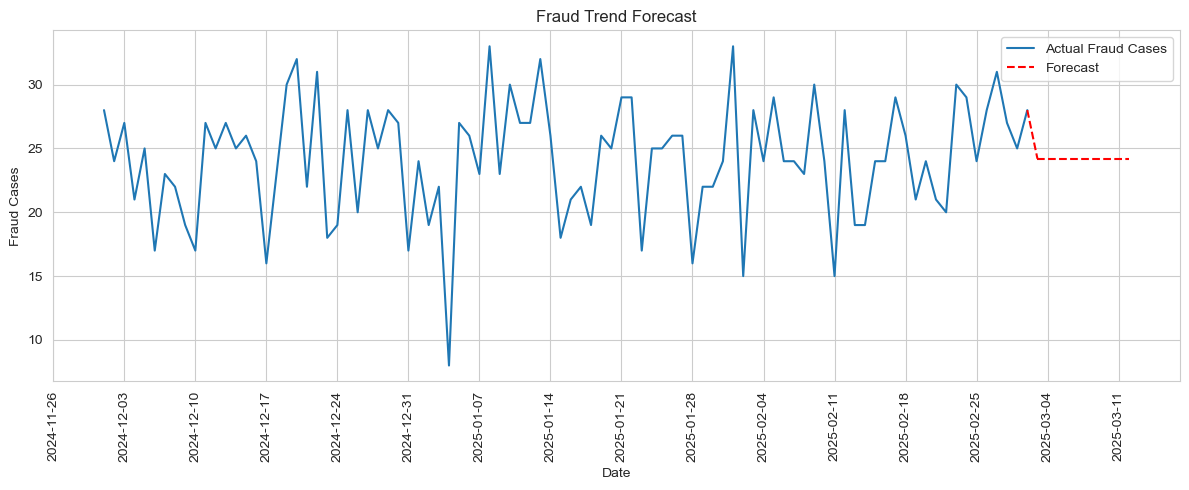

In [18]:
# Fit ARIMA Model
model = ARIMA(fraud_trend, order=(0,0,0))  # (p,d,q) values need tuning
model_fit = model.fit()

# Predict next 7 days
forecast = model_fit.forecast(steps=10)



# Plot the results
plt.figure(figsize=(12,5))
plt.plot(fraud_trend, label="Actual Fraud Cases")

# Create forecast dates starting from the day AFTER the last data point
forecast_dates = pd.date_range(start=fraud_trend.index[-1] + pd.Timedelta(days=1), periods=10, freq='D')

# Plot forecast with the correct date range
plt.plot(forecast_dates, forecast, label="Forecast", linestyle="dashed", color="red")

# Connect the last actual point to the first forecast point
plt.plot([fraud_trend.index[-1], forecast_dates[0]], 
         [fraud_trend.iloc[-1], forecast[0]], 
         linestyle="dashed", color="red")

# Rest of your code remains the same
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Fraud Cases")
plt.title("Fraud Trend Forecast")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [19]:
loanFraud_dataset.head()

,Age,Occupation,MaritalStatus,Dependents,ResidentialStatus,AddressDuration,CreditScore,IncomeLevel,LoanAmountRequested,LoanTerm,...,PaymentBehavior,Blacklists,EmploymentVerification,PastFinancialMalpractices,DeviceInformation,SocialMediaFootprint,ConsistencyinData,Referral,IsFraud,TransactionHour
DummyDate,,,,,,,,,,,,,,,,,,,,,
2024-12-01 10:00:00,56,16,0,4,1,1,827,52033,300000,25,...,2,0,1,0,3,1,0,1,0,10
2024-12-02 16:00:00,40,7,2,0,2,1,830,42893,8105,3,...,2,0,1,0,1,0,0,0,0,16
2024-12-03 03:00:00,25,4,1,0,0,360,809,141233,75734,19,...,2,1,1,0,1,0,0,1,0,3
2024-12-04 16:00:00,34,18,2,0,2,92,630,9217,2000,1,...,0,0,0,1,2,0,1,0,1,16
2024-12-05 12:00:00,47,14,2,0,2,26,733,47979,67767,1,...,2,0,1,0,1,0,0,0,0,12


In [20]:
loanFraud_dataset.columns

Index(['Age', 'Occupation', 'MaritalStatus', 'Dependents', 'ResidentialStatus',
       'AddressDuration', 'CreditScore', 'IncomeLevel', 'LoanAmountRequested',
       'LoanTerm', 'PurposeoftheLoan', 'Collateral', 'InterestRate',
       'PreviousLoans', 'ExistingLiabilities', 'ApplicationBehavior',
       'LocationofApplication', 'ChangeinBehavior', 'AccountActivity',
       'PaymentBehavior', 'Blacklists', 'EmploymentVerification',
       'PastFinancialMalpractices', 'DeviceInformation',
       'SocialMediaFootprint', 'ConsistencyinData', 'Referral', 'IsFraud',
       'TransactionHour'],
      dtype='object')

In [21]:
#Binning time into time category

# # Convert the 'TimeofTransaction' column values to integers --> KIV this
# loanFraud_dataset.replace({'TimeofTransaction': {'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3}}, inplace=True)
# loanFraud_dataset['TimeofTransaction'] = loanFraud_dataset['TimeofTransaction'].astype(int)

# loanFraud_dataset.info()
loanFraud_dataset['TransactionHour'] = loanFraud_dataset['TransactionHour'].astype(str) + ':00'
loanFraud_dataset['TransactionHour'] = pd.to_datetime(loanFraud_dataset['TransactionHour'], format='%H:%M')

# Define a function to categorize the time
def categorize_time(hour):
    if 5 <= hour < 12:  # Morning
        return 1
    elif 12 <= hour < 18:  # Afternoon
        return 2
    elif 18 <= hour < 22:  # Evening
        return 3
    else:  # Night
        return 4

# Apply the function to categorize times
loanFraud_dataset['TimeCategory'] = loanFraud_dataset['TransactionHour'].dt.hour.apply(categorize_time)
loanFraud_dataset.drop(['TransactionHour'], axis=1, inplace=True)
loanFraud_dataset.head()


,Age,Occupation,MaritalStatus,Dependents,ResidentialStatus,AddressDuration,CreditScore,IncomeLevel,LoanAmountRequested,LoanTerm,...,PaymentBehavior,Blacklists,EmploymentVerification,PastFinancialMalpractices,DeviceInformation,SocialMediaFootprint,ConsistencyinData,Referral,IsFraud,TimeCategory
DummyDate,,,,,,,,,,,,,,,,,,,,,
2024-12-01 10:00:00,56,16,0,4,1,1,827,52033,300000,25,...,2,0,1,0,3,1,0,1,0,1
2024-12-02 16:00:00,40,7,2,0,2,1,830,42893,8105,3,...,2,0,1,0,1,0,0,0,0,2
2024-12-03 03:00:00,25,4,1,0,0,360,809,141233,75734,19,...,2,1,1,0,1,0,0,1,0,4
2024-12-04 16:00:00,34,18,2,0,2,92,630,9217,2000,1,...,0,0,0,1,2,0,1,0,1,2
2024-12-05 12:00:00,47,14,2,0,2,26,733,47979,67767,1,...,2,0,1,0,1,0,0,0,0,2


In [22]:
loanFraud_dataset.describe()

,Age,Occupation,MaritalStatus,Dependents,ResidentialStatus,AddressDuration,CreditScore,IncomeLevel,LoanAmountRequested,LoanTerm,...,PaymentBehavior,Blacklists,EmploymentVerification,PastFinancialMalpractices,DeviceInformation,SocialMediaFootprint,ConsistencyinData,Referral,IsFraud,TimeCategory
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,34.837900,8.652700,1.309400,1.323400,1.411300,69.087400,768.701300,45994.615600,57218.915600,13.847700,...,1.669700,0.079000,0.756700,0.030700,1.166700,0.192000,0.319300,0.412800,0.222600,1.893500
std,12.631048,4.948225,0.839727,1.506399,0.570232,84.854114,74.280933,44648.184654,72897.716564,10.923508,...,0.602028,0.269752,0.429096,0.172512,1.115632,0.393893,0.466229,0.492362,0.416013,0.952076
min,22.000000,0.000000,0.000000,0.000000,0.000000,1.000000,580.000000,0.000000,2000.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,22.000000,5.000000,1.000000,0.000000,1.000000,1.000000,721.000000,8277.500000,10555.000000,2.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,31.000000,8.000000,2.000000,1.000000,1.000000,50.000000,801.000000,32791.000000,44008.500000,13.000000,...,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,45.000000,12.000000,2.000000,2.000000,2.000000,86.000000,830.000000,71698.000000,68073.750000,24.000000,...,2.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,56.000000,18.000000,2.000000,4.000000,2.000000,360.000000,830.000000,150000.000000,300000.000000,30.000000,...,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000


<h2>Correlation Heatmap for Loan Fraud</h2>

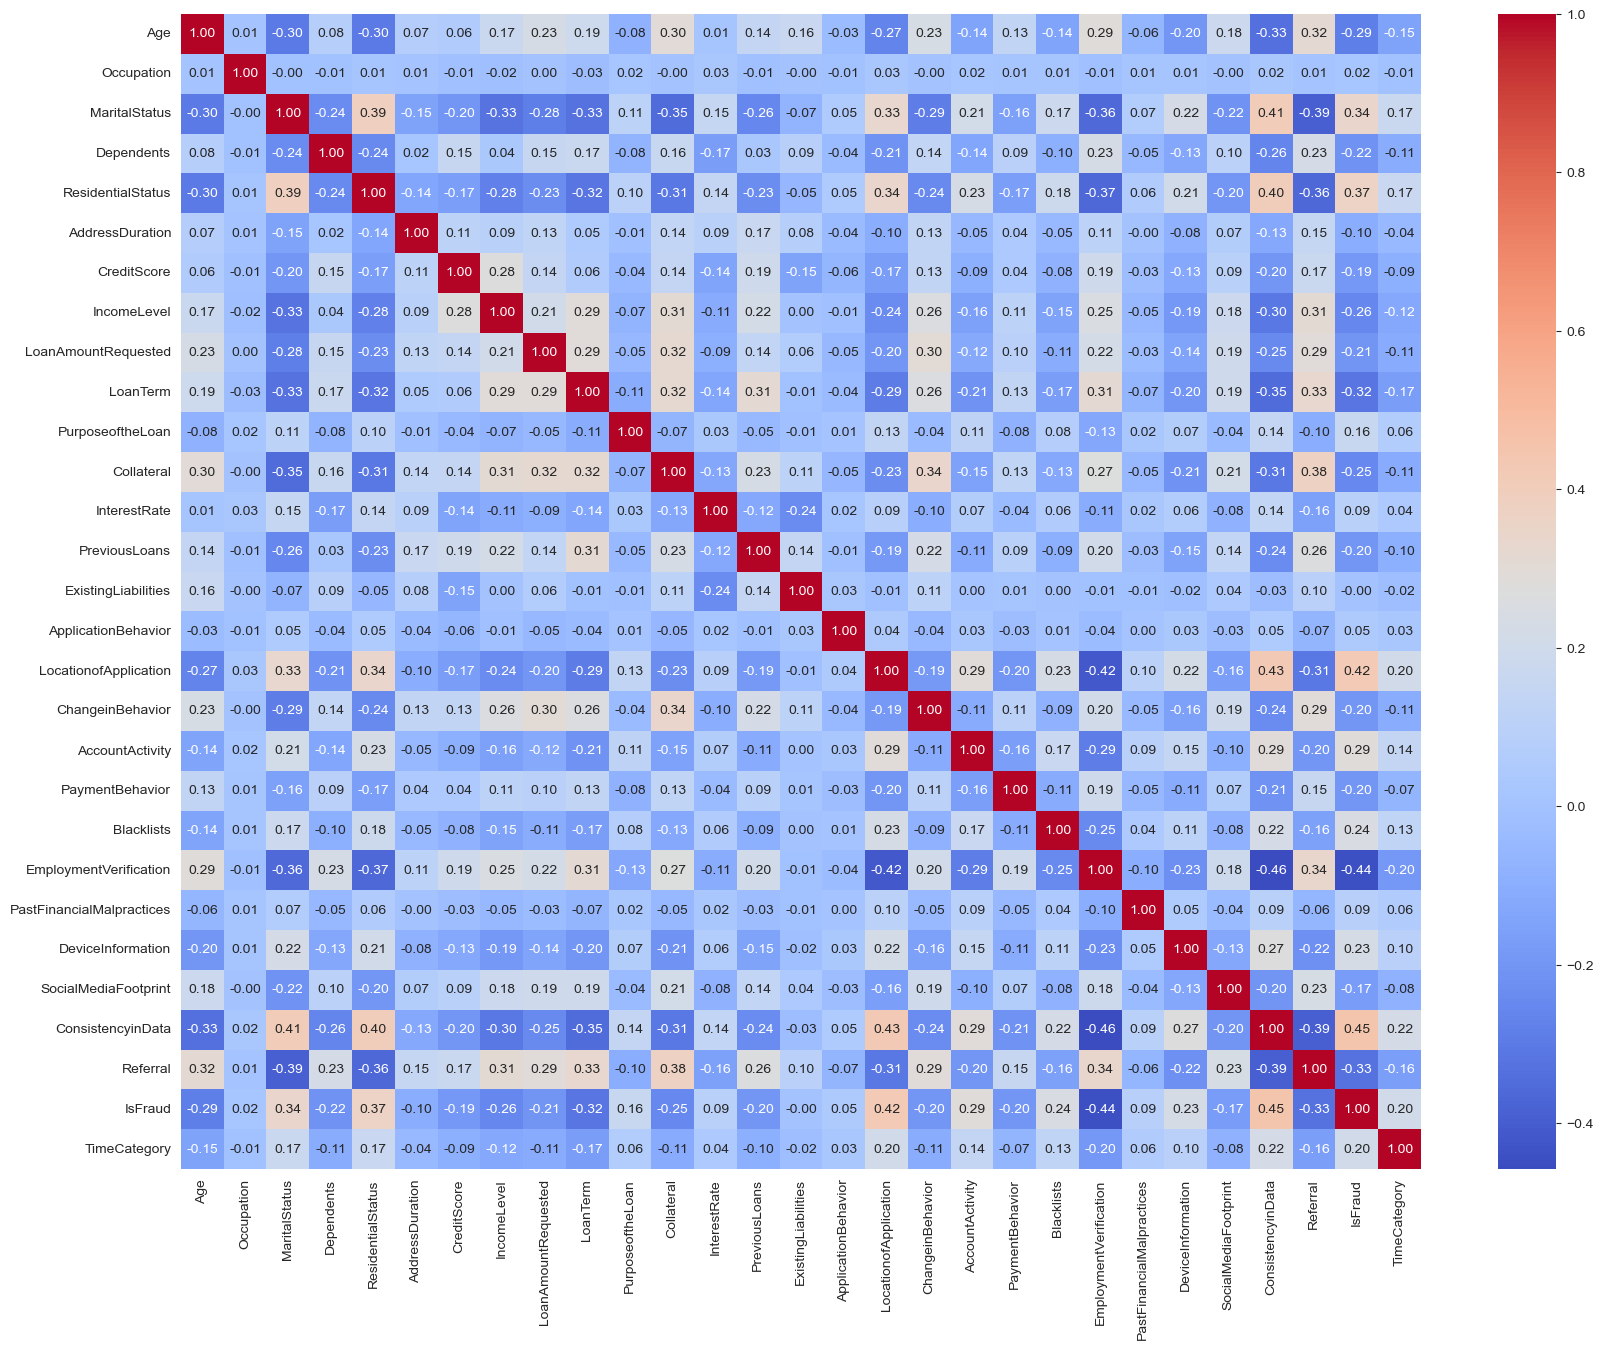

In [23]:
plt.figure(figsize=(20, 15))
sns.heatmap(loanFraud_dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# columns_to_retain = ['LoanAmountRequested', 'LoanTerm', 'ExistingLiabilities', 'PreviousLoans', 'Dependents', 'Occupation', 'IncomeLevel', 'ResidentialStatus', 'CreditScore', 'IsFraud']

<h2>Base Model Prediction</h2>

In [24]:
Xacc = loanFraud_dataset.drop(['IsFraud'], axis=1)
Yacc = loanFraud_dataset['IsFraud']

Xacc_train, Xacc_test, Yacc_train, Yacc_test = train_test_split(Xacc, Yacc, test_size=0.3, random_state=1)

In [25]:
sc = StandardScaler()
Xacc_train = sc.fit_transform(Xacc_train)
Xacc_test = sc.transform(Xacc_test)
#print(Xacc_train)

LogReg = LogisticRegression()
DTClassifier = DecisionTreeClassifier()
RFClassifier = RandomForestClassifier()
SVMClassifier = SVC()
KNNClassifier = KNeighborsClassifier()
GBClassifier = GradientBoostingClassifier()
xgb_loan = XGBClassifier()

LogReg.fit(Xacc_train, Yacc_train)
Yacc_log = LogReg.predict(Xacc_test)
DTClassifier.fit(Xacc_train, Yacc_train)
Yacc_dt = DTClassifier.predict(Xacc_test)
RFClassifier.fit(Xacc_train, Yacc_train)
Yacc_rf = RFClassifier.predict(Xacc_test)
SVMClassifier.fit(Xacc_train, Yacc_train)
Yacc_svm = SVMClassifier.predict(Xacc_test)
KNNClassifier.fit(Xacc_train, Yacc_train)
Yacc_knn = KNNClassifier.predict(Xacc_test)
GBClassifier.fit(Xacc_train, Yacc_train)
Yacc_gb = GBClassifier.predict(Xacc_test)
xgb_loan.fit(Xacc_train, Yacc_train)
Yacc_xgb = xgb_loan.predict(Xacc_test)

In [26]:
Xacc_test_df = pd.DataFrame(Xacc_test)
Xacc_test_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.004909,-0.009164,0.004977,-0.004795,0.039143,0.006304,-0.015423,-0.021350,0.005112,0.004703,...,0.012044,-0.023860,0.010645,-0.001221,0.002489,0.025621,-0.006036,-0.002961,-0.011986,0.013299
std,0.972383,1.004272,0.991103,0.993243,0.983294,0.995756,0.983279,0.986064,0.993478,0.999378,...,1.016316,1.007035,1.016708,1.000897,1.006930,1.006763,0.995434,0.999017,0.998014,1.011059
min,-1.006569,-1.753656,-1.553678,-0.878183,-2.451285,-0.799498,-2.532399,-1.032326,-0.754475,-1.174524,...,-0.328551,-2.786647,-0.291147,-1.764315,-0.177582,-1.040287,-0.488589,-0.685544,-0.841517,-0.937628
25%,-1.006569,-0.741887,-0.365981,-0.878183,-0.706066,-0.799498,-0.683803,-0.858100,-0.630985,-1.082995,...,-0.328551,-1.121983,-0.291147,0.566792,-0.177582,-1.040287,-0.488589,-0.685544,-0.841517,-0.937628
50%,-0.221361,-0.134825,0.821717,-0.215689,-0.706066,-0.210997,0.401243,-0.306971,-0.173109,-0.076178,...,-0.328551,0.542680,-0.291147,0.566792,-0.177582,-0.142050,-0.488589,-0.685544,-0.841517,0.116225
75%,0.799409,0.674590,0.821717,0.446805,1.039154,0.200953,0.816507,0.536591,0.155467,0.930639,...,-0.328551,0.542680,-0.291147,0.566792,-0.177582,0.756187,-0.488589,1.458696,1.188331,0.116225
max,1.663138,1.888713,0.821717,1.771793,1.039154,3.425933,0.816507,2.313460,3.325477,1.479812,...,3.043670,0.542680,3.434687,0.566792,5.631188,1.654424,2.046712,1.458696,1.188331,2.223932


In [27]:
models = {
    "Logistic Regression": Yacc_log,
    "Decision Tree": Yacc_dt,
    "Random Forest": Yacc_rf,
    "SVM": Yacc_svm,
    "KNN": Yacc_knn,
    "Gradient Boosting": Yacc_gb,
    "XGB": Yacc_xgb
}

for model_name, y_pred in models.items():
    accuracy = accuracy_score(Yacc_test, y_pred)
    report = classification_report(Yacc_test, y_pred)
    conf_matrix = confusion_matrix(Yacc_test, y_pred)

    print(f"\nModel: {model_name}")
    print(f"Validation Accuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", report)
    print("\nConfusion Matrix:\n", conf_matrix)
    print("=" * 50)  # Separator for better readability



Model: Logistic Regression
Validation Accuracy: 0.8450

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      2307
           1       0.72      0.54      0.62       693

    accuracy                           0.84      3000
   macro avg       0.80      0.74      0.76      3000
weighted avg       0.84      0.84      0.84      3000


Confusion Matrix:
 [[2161  146]
 [ 319  374]]

Model: Decision Tree
Validation Accuracy: 0.7697

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      2307
           1       0.50      0.50      0.50       693

    accuracy                           0.77      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.77      0.77      0.77      3000


Confusion Matrix:
 [[1960  347]
 [ 344  349]]

Model: Random Forest
Validation Accuracy: 0.8360

Classification Report:
               precisi

<h2>Record Sampling</h2>

Testing with 70/30 split (70% Non Fraud | 30% Fraud) <br>
AND <br> Testing with 50/50 split (50% Non Fraud | 50% Fraud)

In [28]:
# # 70/30 split
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.combine import SMOTETomek, SMOTEENN

# Xacc_train, Xacc_test, Yacc_train, Yacc_test = model_selection.train_test_split(Xacc, Yacc, test_size=0.3, random_state=1)

# sc = StandardScaler()
# Xacc_train = sc.fit_transform(Xacc_train)
# Xacc_test = sc.transform(Xacc_test)


# # Resample only to the training data
# # Setting sampling_strategy=0.43 will give roughly 70:30 ratio (non-fraud:fraud)

# # 1. Undersampling
# undersampler = RandomUnderSampler(sampling_strategy=0.43, random_state=42)
# X_under, y_under = undersampler.fit_resample(Xacc_train, Yacc_train)

# # 2. SMOTE only
# smote = SMOTE(sampling_strategy=0.43, random_state=42)
# X_smote, y_smote = smote.fit_resample(Xacc_train, Yacc_train)

# # 3. SMOTETomek (SMOTE + Tomek Links)
# smotetomek = SMOTETomek(sampling_strategy=0.43, random_state=42)
# X_smotetomek, y_smotetomek = smotetomek.fit_resample(Xacc_train, Yacc_train)

# # 4. SMOTEENN (SMOTE + Edited Nearest Neighbors)
# smoteenn = SMOTEENN(sampling_strategy=0.43, random_state=42)
# X_smoteenn, y_smoteenn = smoteenn.fit_resample(Xacc_train, Yacc_train)

# # Print distributions for comparison
# print("Original distribution:")
# print(pd.Series(Yacc_train).value_counts(normalize=True))
# print("\nUndersampling distribution:")
# print(pd.Series(y_under).value_counts(normalize=True))
# print("\nSMOTE distribution:")
# print(pd.Series(y_smote).value_counts(normalize=True))
# print("\nSMOTETomek distribution:")
# print(pd.Series(y_smotetomek).value_counts(normalize=True))
# print("\nSMOTEENN distribution:")
# print(pd.Series(y_smoteenn).value_counts(normalize=True))

# # Visualize distributions
# plt.figure(figsize=(15, 5))

# # Create DataFrames for each distribution to be plotted
# df_original = pd.DataFrame({'Class': Yacc_train})
# df_under = pd.DataFrame({'Class': y_under})
# df_smote = pd.DataFrame({'Class': y_smote})
# df_smotetomek = pd.DataFrame({'Class': y_smotetomek})
# df_smoteenn = pd.DataFrame({'Class': y_smoteenn})

# # Original
# plt.subplot(151)
# sns.countplot(data=df_original, x='Class')
# plt.title('Original')

# # Undersampling
# plt.subplot(152)
# sns.countplot(data=df_under, x='Class')
# plt.title('Undersampling')

# # SMOTE
# plt.subplot(153)
# sns.countplot(data=df_smote, x='Class')
# plt.title('SMOTE')

# # SMOTETomek
# plt.subplot(154)
# sns.countplot(data=df_smotetomek, x='Class')
# plt.title('SMOTETomek')

# # SMOTEENN
# plt.subplot(155)
# sns.countplot(data=df_smoteenn, x='Class')
# plt.title('SMOTEENN')

# plt.tight_layout()
# plt.show()

In [29]:
# resampled_sets = {
#     'Original': (Xacc_train, Yacc_train),
#     'Undersampling': (X_under, y_under),
#     'SMOTE': (X_smote, y_smote),
#     'SMOTETomek': (X_smotetomek, y_smotetomek),
#     'SMOTEENN': (X_smoteenn, y_smoteenn)
# }

# for resample_name, (X_res, y_res) in resampled_sets.items():
#     print(f"\nResults for {resample_name}:")
#     # Train
#     LogReg.fit(X_res, y_res)
#     # Predict
#     y_pred = LogReg.predict(Xacc_test)
#     # Get accuracy
#     acc = accuracy_score(Yacc_test, y_pred)
#     print(f"{LogReg} Accuracy: {acc:.3f}")
#     print(classification_report(Yacc_test, y_pred))

In [30]:
# # 50/50 split
# Xacc_train, Xacc_test, Yacc_train, Yacc_test = model_selection.train_test_split(Xacc, Yacc, test_size=0.3, random_state=1)

# sc = StandardScaler()
# Xacc_train = sc.fit_transform(Xacc_train)
# Xacc_test = sc.transform(Xacc_test)


# # Resample only to the training data
# # Setting sampling_strategy=1.0 will give 50:50 ratio (non-fraud:fraud)

# # 1. Undersampling
# undersampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
# X_under, y_under = undersampler.fit_resample(Xacc_train, Yacc_train)

# # 2. SMOTE only
# smote = SMOTE(sampling_strategy=1.0, random_state=42)
# X_smote, y_smote = smote.fit_resample(Xacc_train, Yacc_train)

# # 3. SMOTETomek (SMOTE + Tomek Links)
# smotetomek = SMOTETomek(sampling_strategy=1.0, random_state=42)
# X_smotetomek, y_smotetomek = smotetomek.fit_resample(Xacc_train, Yacc_train)

# # 4. SMOTEENN (SMOTE + Edited Nearest Neighbors)
# smoteenn = SMOTEENN(sampling_strategy=1.0, random_state=42)
# X_smoteenn, y_smoteenn = smoteenn.fit_resample(Xacc_train, Yacc_train)

# # Print distributions for comparison
# print("Original distribution:")
# print(pd.Series(Yacc_train).value_counts(normalize=True))
# print("\nUndersampling distribution:")
# print(pd.Series(y_under).value_counts(normalize=True))
# print("\nSMOTE distribution:")
# print(pd.Series(y_smote).value_counts(normalize=True))
# print("\nSMOTETomek distribution:")
# print(pd.Series(y_smotetomek).value_counts(normalize=True))
# print("\nSMOTEENN distribution:")
# print(pd.Series(y_smoteenn).value_counts(normalize=True))

# # Visualize distributions
# plt.figure(figsize=(15, 5))

# # Create DataFrames for each distribution to be plotted
# df_original = pd.DataFrame({'Class': Yacc_train})
# df_under = pd.DataFrame({'Class': y_under})
# df_smote = pd.DataFrame({'Class': y_smote})
# df_smotetomek = pd.DataFrame({'Class': y_smotetomek})
# df_smoteenn = pd.DataFrame({'Class': y_smoteenn})

# # Original
# plt.subplot(151)
# sns.countplot(data=df_original, x='Class')
# plt.title('Original')

# # Undersampling
# plt.subplot(152)
# sns.countplot(data=df_under, x='Class')
# plt.title('Undersampling')

# # SMOTE
# plt.subplot(153)
# sns.countplot(data=df_smote, x='Class')
# plt.title('SMOTE')

# # SMOTETomek
# plt.subplot(154)
# sns.countplot(data=df_smotetomek, x='Class')
# plt.title('SMOTETomek')

# # SMOTEENN
# plt.subplot(155)
# sns.countplot(data=df_smoteenn, x='Class')
# plt.title('SMOTEENN')

# plt.tight_layout()
# plt.show()

In [31]:
# resampled_sets = {
#     'Original': (Xacc_train, Yacc_train),
#     'Undersampling': (X_under, y_under),
#     'SMOTE': (X_smote, y_smote),
#     'SMOTETomek': (X_smotetomek, y_smotetomek),
#     'SMOTEENN': (X_smoteenn, y_smoteenn)
# }

# for resample_name, (X_res, y_res) in resampled_sets.items():
#     print(f"\nResults for {resample_name}:")
#     # Train
#     LogReg.fit(X_res, y_res)
#     # Predict
#     y_pred = LogReg.predict(Xacc_test)
#     # Get accuracy
#     acc = accuracy_score(Yacc_test, y_pred)
#     print(f"{LogReg} Accuracy: {acc:.3f}")
#     print(classification_report(Yacc_test, y_pred))

In [32]:
# Xacc_train, Xacc_test, Yacc_train, Yacc_test = train_test_split(Xacc, Yacc, test_size=0.3, random_state=1)



# # Define your samplers (use None for the Original data)
# samplers = {
#     'Original': None,
#     'Undersampling (70:30)': RandomUnderSampler(sampling_strategy=0.43, random_state=42),
#     'SMOTE (70:30)': SMOTE(sampling_strategy=0.43, random_state=42),
#     'SMOTETomek (70:30)': SMOTETomek(sampling_strategy=0.43, random_state=42),
#     'SMOTEENN (70:30)': SMOTEENN(sampling_strategy=0.43, random_state=42),
#     'Undersampling (50:50)': RandomUnderSampler(sampling_strategy=1.0, random_state=42),
#     'SMOTE (50:50)': SMOTE(sampling_strategy=1.0, random_state=42),
#     'SMOTETomek (50:50)': SMOTETomek(sampling_strategy=1.0, random_state=42),
#     'SMOTEENN (50:50)': SMOTEENN(sampling_strategy=1.0, random_state=42)
# }

# # Define your models
# models = {
#     "Logistic Regression": LogReg,
#     "Decision Tree": DTClassifier,
#     "Random Forest": RFClassifier,
#     "SVM": SVMClassifier,
#     "KNN": KNNClassifier,
#     "Gradient Boosting": GBClassifier,
#     "XGB": XGBClassifier
# }

# # Loop over each sampler and model combination
# for sampler_name, sampler in samplers.items():
#     print(f"\nResampling Method: {sampler_name}")
#     for model_name, model_instance in models.items():
#         # Build a pipeline: if no sampler, only include the classifier.
#         if sampler is not None:
#             pipe = Pipeline([
#                 ('sampler', sampler),
#                 ('classifier', model_instance)
#             ])
#         else:
#             pipe = Pipeline([
#                 ('classifier', model_instance)
#             ])
        
        
#         # Scale the data
#         sc = StandardScaler()
#         Xacc_train = sc.fit_transform(Xacc_train)
#         Xacc_test = sc.transform(Xacc_test)    
    
#         # Train on the (resampled) training data
#         pipe.fit(Xacc_train, Yacc_train)
#         # Predict on the test data (test set remains unchanged)
#         y_pred = pipe.predict(Xacc_test)
#         acc = accuracy_score(Yacc_test, y_pred)
#         print(f"Model: {model_name} Accuracy: {acc:.3f}")
#         print(classification_report(Yacc_test, y_pred))
#         print("=" * 50)
        
#         #Loan Fraud Dataset
#         #SMOTEENN (70/30) 
#         #Model: Random Forest Accuracy: 0.842

In [33]:
results = []

# Define samplers (use None for the Original data)
samplers = {
    'Undersampling (70:30)': RandomUnderSampler(sampling_strategy=0.43, random_state=42),
    'SMOTE (70:30)': SMOTE(sampling_strategy=0.43, random_state=42),
    'SMOTETomek (70:30)': SMOTETomek(sampling_strategy=0.43, random_state=42),
    'SMOTEENN (70:30)': SMOTEENN(sampling_strategy=0.43, random_state=42),
    # 'Undersampling (50:50)': RandomUnderSampler(sampling_strategy=1.0, random_state=42),
    # 'SMOTE (50:50)': SMOTE(sampling_strategy=1.0, random_state=42),
    # 'SMOTETomek (50:50)': SMOTETomek(sampling_strategy=1.0, random_state=42),
    # 'SMOTEENN (50:50)': SMOTEENN(sampling_strategy=1.0, random_state=42)
}


# Define models
models = {
    "Logistic Regression": LogReg,
    "Decision Tree": DTClassifier,
    "Random Forest": RFClassifier,
    "SVM": SVMClassifier,
    "KNN": KNNClassifier,
    "Gradient Boosting": GBClassifier,
    "XGB": xgb_loan
}

# Loop over each sampler and model combination
for sampler_name, sampler in samplers.items():
    for model_name, model_instance in models.items():
        # Build a pipeline: if no sampler, only include classifier
        if sampler is not None:
            pipe = Pipeline([
                ('sampler', sampler),
                ('classifier', model_instance)
            ])
        else:
            pipe = Pipeline([
                ('classifier', model_instance)
            ])
            
        # Scale the data
        sc = StandardScaler()
        Xacc_train = sc.fit_transform(Xacc_train)
        Xacc_test = sc.transform(Xacc_test)    
            
        # Train on the (resampled) training data
        pipe.fit(Xacc_train, Yacc_train)
        # Predict on the test data (test set remains unchanged)
        y_pred = pipe.predict(Xacc_test)
        acc = accuracy_score(Yacc_test, y_pred)
        f1 = f1_score(Yacc_test, y_pred, average='binary')

        results.append({
            'Resampling': sampler_name,
            'Model': model_name,
            'Accuracy': acc,
            'F1': f1,
            'Pipeline': pipe  # Saving the pipeline might be useful later
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# To get the best model based on accuracy
best_pipeline = results_df.sort_values(by=['Accuracy'], ascending=False).head(1)
print("\nBest performing model:")
print(best_pipeline)

# best_df = best_pipeline['Pipeline'].values[0]
# print(best_df)


 #Loan Fraud Dataset
        #SMOTEENN (70/30) 
        #Model: Gradient Boosting Accuracy: 0.841333



Best performing model:
      Resampling          Model  Accuracy        F1  \
9  SMOTE (70:30)  Random Forest  0.844333  0.617527   

                                            Pipeline  
9  (SMOTE(random_state=42, sampling_strategy=0.43...  


Gradient Boosting Classification Model Code

In [34]:
# # Instantiate model
# GBClassifier = GradientBoostingClassifier(n_estimators= 100, learning_rate= 0.1, max_depth= 3, random_state = 42)

# GBClassifier.fit(Xacc_train, Yacc_train)
# Yacc_gb = GBClassifier.predict(Xacc_train)

# # For evaluating the model
# accuracy = accuracy_score(Yacc_train, Yacc_gb)
# print(f"Accuracy: {accuracy:.2f}")

# #Classification Report
# print("Classification Report:")
# print(confusion_matrix(Yacc_train, Yacc_gb))

# #Feature Importance
# featureImportances = GBClassifier.feature_importances_
# plt.bar(range(len(featureImportances)), featureImportances)
# plt.xlabel("Feature Index")
# plt.ylabel("Importance Score")
# plt.title("Feature Importances")
# plt.show()

# # HyperTuning
# # parameters for GridSearchCV
# paramGrid = {
#     'n_estimators': [50, 100],
#     'learning_rate': [0.1],
#     'max_depth': [3, 5],
# }

# gridSearch = GridSearchCV(estimator=GBClassifier, param_grid=paramGrid, cv=3, scoring='accuracy', n_jobs=-1)
# gridSearch.fit(Xacc_train, Yacc_train)

# bestParams = gridSearch.best_params_
# bestModel = gridSearch.best_estimator_

# yPredBest = bestModel.predict(Xacc_test)
# accuracyBest = accuracy_score(Yacc_test, yPredBest)
# print("Best Parameters:", bestParams)
# print(f"Best Model Accuracy: {accuracyBest:.2f}")

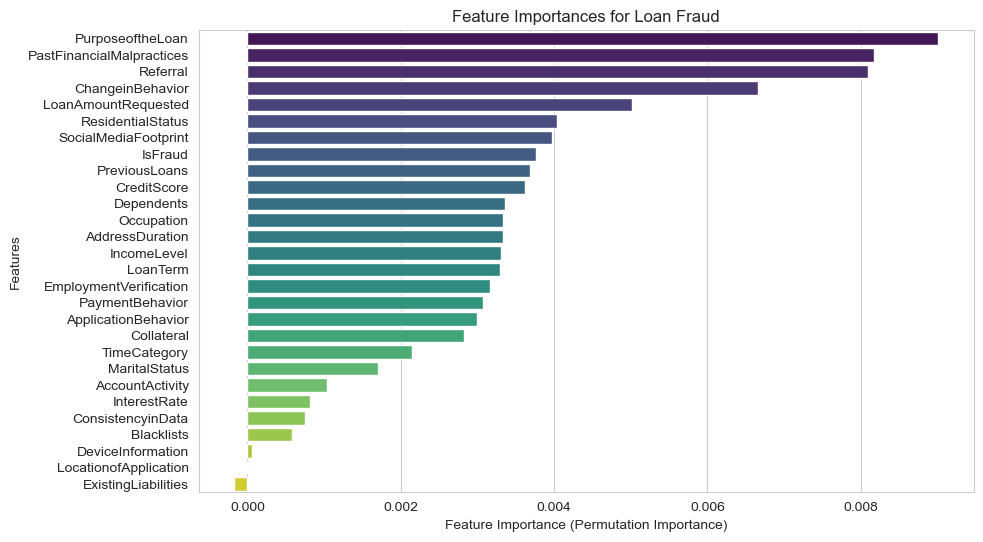

In [35]:
from sklearn.inspection import permutation_importance

gbc_featimpt = GBClassifier.fit(Xacc_train, Yacc_train)

# Calculate feature importances using permutation importance
perm_importance = permutation_importance(gbc_featimpt, Xacc_test, Yacc_test, n_repeats=30, random_state=42)

# Extract and store feature importances
importance_scores = perm_importance.importances_mean
feature_names = loanFraud_dataset.columns[1:]  # Assuming processedDf contains your data with column names
feature_importances = dict(zip(feature_names, importance_scores))

# Sort feature importances
sorted_feature_importances = dict(sorted(feature_importances.items(), key=lambda x: x[1], reverse=True))

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=list(sorted_feature_importances.values()), y=list(sorted_feature_importances.keys()), palette='viridis')
plt.xlabel('Feature Importance (Permutation Importance)')
plt.ylabel('Features')
plt.title('Feature Importances for Loan Fraud')
plt.show()

#Results show negative correlation for existing liabilities
#Results also show little to no correlation on device information and location of application

In [36]:
loanFraud_dataset_featureImpt = loanFraud_dataset.drop(['DeviceInformation', 'LocationofApplication', 'ExistingLiabilities'], axis=1) #consider adding blacklist
loanFraud_dataset_featureImpt.head()

,Age,Occupation,MaritalStatus,Dependents,ResidentialStatus,AddressDuration,CreditScore,IncomeLevel,LoanAmountRequested,LoanTerm,...,AccountActivity,PaymentBehavior,Blacklists,EmploymentVerification,PastFinancialMalpractices,SocialMediaFootprint,ConsistencyinData,Referral,IsFraud,TimeCategory
DummyDate,,,,,,,,,,,,,,,,,,,,,
2024-12-01 10:00:00,56,16,0,4,1,1,827,52033,300000,25,...,0,2,0,1,0,1,0,1,0,1
2024-12-02 16:00:00,40,7,2,0,2,1,830,42893,8105,3,...,0,2,0,1,0,0,0,0,0,2
2024-12-03 03:00:00,25,4,1,0,0,360,809,141233,75734,19,...,0,2,1,1,0,0,0,1,0,4
2024-12-04 16:00:00,34,18,2,0,2,92,630,9217,2000,1,...,1,0,0,0,1,0,1,0,1,2
2024-12-05 12:00:00,47,14,2,0,2,26,733,47979,67767,1,...,0,2,0,1,0,0,0,0,0,2


In [37]:
Xfeat = loanFraud_dataset_featureImpt.drop(['IsFraud'], axis=1)
Yfeat = loanFraud_dataset_featureImpt['IsFraud']

Xfeat_train, Xfeat_test, Yfeat_train, Yfeat_test = train_test_split(Xfeat, Yfeat, test_size=0.3, random_state=1)

In [38]:
sc = StandardScaler()
Xfeat_train = sc.fit_transform(Xfeat_train)
Xfeat_test = sc.transform(Xfeat_test)

gbc_featimpt.fit(Xfeat_train, Yfeat_train)
Yfeat_gb = gbc_featimpt.predict(Xfeat_train)

# For evaluating the model

# accuracy = accuracy_score(Yfeat_train, Yfeat_gb)
# print(f"Accuracy: {accuracy:.2f}")

# #Classification Report
# print("Classification Report:")
# print(confusion_matrix(Yfeat_train, Yfeat_gb))

accuracy_feat = accuracy_score(Yfeat_train, Yfeat_gb) # Accuracy classification score
report_feat = classification_report(Yfeat_train, Yfeat_gb) # Build a text report showing the main classification metrics
conf_matrix_feat = confusion_matrix(Yfeat_train, Yfeat_gb) # Compute confusion matrix to evaluate the accuracy of a classification

print("Validation Accuracy:", accuracy_feat) 
print("\nClassification Report:\n", report_feat)
print("\nConfusion Matrix:\n", conf_matrix_feat)


Validation Accuracy: 0.8685714285714285

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      5467
           1       0.75      0.61      0.67      1533

    accuracy                           0.87      7000
   macro avg       0.82      0.77      0.79      7000
weighted avg       0.86      0.87      0.86      7000


Confusion Matrix:
 [[5152  315]
 [ 605  928]]


In [39]:
# DTClassifier.fit(Xacc_train, Yacc_train)
# Yacc_dt = DTClassifier.predict(Xacc_test)

In [40]:
# accuracy = accuracy_score(Yacc_test, Yacc_log) # Accuracy classification score
# report = classification_report(Yacc_test, Yacc_log) # Build a text report showing the main classification metrics
# conf_matrix = confusion_matrix(Yacc_test, Yacc_log) # Compute confusion matrix to evaluate the accuracy of a classification

# print("Validation Accuracy:", accuracy) 
# print("\nClassification Report:\n", report)
# print("\nConfusion Matrix:\n", conf_matrix)

# # Define labels for the heatmap
# labels = ['Not Fraud', 'Fraud']

# # Create the heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# # Add titles and labels
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()

<h3>Anomaly Detection</h3>

In [41]:
isoForest = IsolationForest(contamination=0.01, random_state=42)
isoForest.fit(Xacc)
loanFraud_dataset["Anomaly_Score"] = isoForest.decision_function(Xacc)
loanFraud_dataset["Anomaly"] = isoForest.predict(Xacc)

pd.DataFrame({'Anomaly Score': loanFraud_dataset["Anomaly_Score"], 'Anomaly': loanFraud_dataset["Anomaly"]})


c:\Users\xuanw\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,Anomaly Score,Anomaly
DummyDate,,
2024-12-01 10:00:00,0.020650,1
2024-12-02 16:00:00,0.160030,1
2024-12-03 03:00:00,0.006534,1
2024-12-04 16:00:00,0.021515,1
2024-12-05 12:00:00,0.124973,1
...,...,...
2025-01-29 10:00:00,0.107864,1
2025-01-30 15:00:00,0.134355,1
2025-01-31 14:00:00,0.085887,1


Inliers (Normal) Statistics:
Count: 9900
Average Credit Score: 768.88
Average Income: $46157.04

Outliers (Anomaly) Statistics:
Count: 100
Average Credit Score: 751.05
Average Income: $29914.93


<Figure size 1000x600 with 0 Axes>

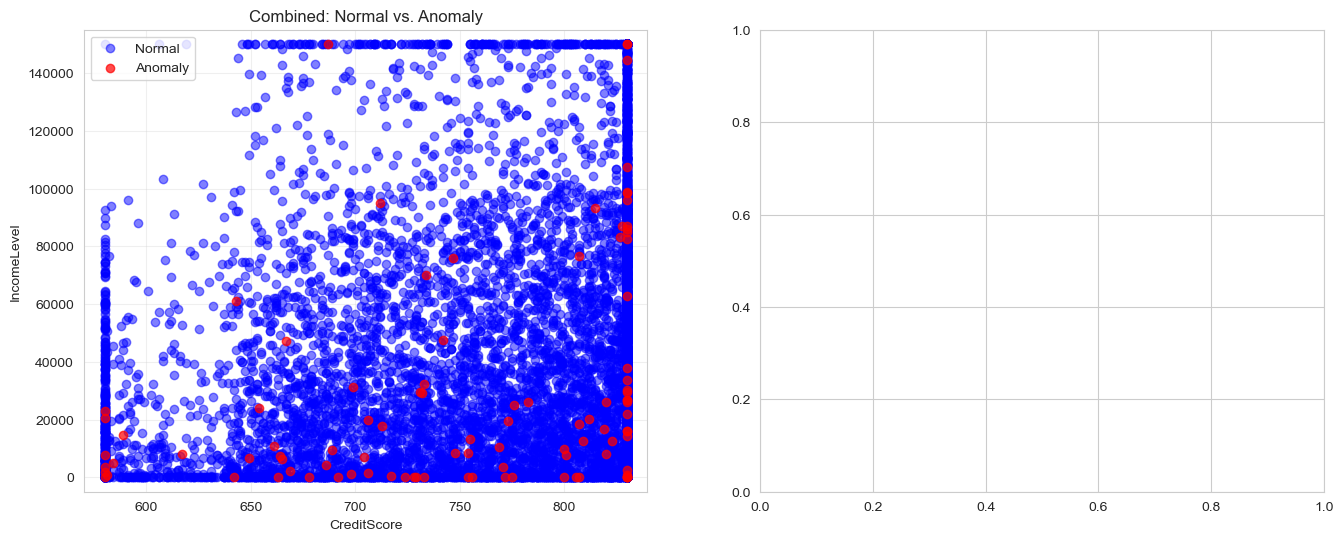

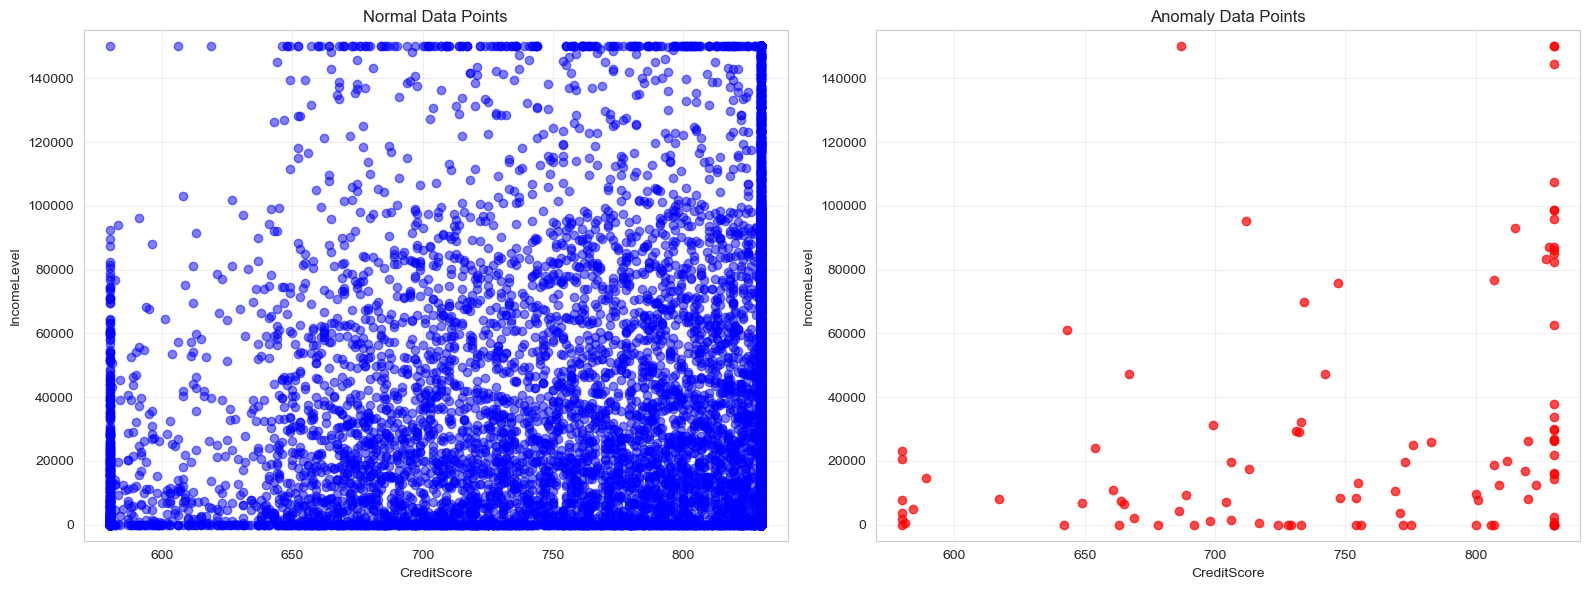

In [42]:
# Create a scatter plot with colors based on the anomaly detection
plt.figure(figsize=(10, 6))

# Convert the anomaly predictions to a more interpretable format
# In Isolation Forest, -1 indicates outliers and 1 indicates inliers
outliers = (loanFraud_dataset["Anomaly"] == -1)

# Choose features to plot
feature1 = 'CreditScore'
feature2 = 'IncomeLevel'

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Combined view (similar to your original image)
# Plot inliers in blue
ax1.scatter(
    loanFraud_dataset.loc[~outliers, feature1],
    loanFraud_dataset.loc[~outliers, feature2],
    c='blue', label='Normal', alpha=0.5
)
# Plot outliers in red
ax1.scatter(
    loanFraud_dataset.loc[outliers, feature1],
    loanFraud_dataset.loc[outliers, feature2],
    c='red', label='Anomaly', alpha=0.7
)
ax1.set_xlabel(feature1)
ax1.set_ylabel(feature2)
ax1.set_title('Combined: Normal vs. Anomaly')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Create separate figure for side-by-side visualization
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 2: Only inliers (normal data)
ax3.scatter(
    loanFraud_dataset.loc[~outliers, feature1],
    loanFraud_dataset.loc[~outliers, feature2],
    c='blue', alpha=0.5
)
ax3.set_xlabel(feature1)
ax3.set_ylabel(feature2)
ax3.set_title('Normal Data Points')
ax3.grid(True, alpha=0.3)

# Plot 3: Only outliers (anomalies)
ax4.scatter(
    loanFraud_dataset.loc[outliers, feature1],
    loanFraud_dataset.loc[outliers, feature2],
    c='red', alpha=0.7
)
ax4.set_xlabel(feature1)
ax4.set_ylabel(feature2)
ax4.set_title('Anomaly Data Points')
ax4.grid(True, alpha=0.3)

# Make sure both plots use the same scale for fair comparison
x_min = loanFraud_dataset[feature1].min() - 10
x_max = loanFraud_dataset[feature1].max() + 10
y_min = loanFraud_dataset[feature2].min() - 5000
y_max = loanFraud_dataset[feature2].max() + 5000

for ax in [ax1, ax3, ax4]:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

# Add summary statistics as text
anomaly_stats = loanFraud_dataset[outliers].describe().round(2)
normal_stats = loanFraud_dataset[~outliers].describe().round(2)

# Print summary statistics 
print("Inliers (Normal) Statistics:")
print(f"Count: {sum(~outliers)}")
print(f"Average Credit Score: {normal_stats.loc['mean', 'CreditScore']}")
print(f"Average Income: ${normal_stats.loc['mean', 'IncomeLevel']:.2f}")

print("\nOutliers (Anomaly) Statistics:")
print(f"Count: {sum(outliers)}")
print(f"Average Credit Score: {anomaly_stats.loc['mean', 'CreditScore']}")
print(f"Average Income: ${anomaly_stats.loc['mean', 'IncomeLevel']:.2f}")

# Show the plots
plt.tight_layout()
plt.show()

<h1>Credit Card Attrition and Fraud</h1>

In [43]:
creditcard_dataset = creditcard_dataset.dropna()
creditcard_dataset.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [44]:
creditcard_dataset.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], axis=1, inplace=True)
creditcard_dataset.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)
creditcard_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [45]:
#Drop any unknown values from identified Columns
creditcard_dataset = creditcard_dataset[~creditcard_dataset['Income_Category'].str.contains('Unknown')]
creditcard_dataset = creditcard_dataset[~creditcard_dataset['Education_Level'].str.contains('Unknown')]
creditcard_dataset = creditcard_dataset[~creditcard_dataset['Marital_Status'].str.contains('Unknown')]


Income = creditcard_dataset['Income_Category']

# Add another column for the randomized Income value based on their category
income_generator = []
income_Range_in_Value = {
    'Less than $40K': (0, 39999),
    '$40K - $60K': (40000, 59999),
    '$60K - $80K': (60000, 79999),
    '$80K - $120K': (80000, 119999),
    '$120K +': (120000, 200000),
}

for i in Income:
    income_generator.append(random.randint(*income_Range_in_Value.get(i, (0, 39999))))

creditcard_dataset['Income'] = income_generator

creditcard_dataset.head()
    

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,70771
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,7364
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,85258
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,63530
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,53488


In [46]:
#Reset index as index didnt auto increment after dropping
creditcard_dataset = creditcard_dataset.reset_index()

percentageExpend = []
AvgSpentPerTrans = []

#Calculate percentage of Income Spent & Average Expenditure Per Transaction Count
for i in range(len(creditcard_dataset)):
    expendPercentage = (creditcard_dataset['Total_Trans_Amt'][i]/creditcard_dataset['Income'][i]) * 100
    AvgSpent = creditcard_dataset['Total_Trans_Amt'][i]/creditcard_dataset['Total_Trans_Ct'][i]
    percentageExpend.insert(i, expendPercentage)
    AvgSpentPerTrans.insert(i, AvgSpent)

#Added column percentage of income expenditure
creditcard_dataset['percentage_expenditure'] = percentageExpend
#Added average spent per transaction
creditcard_dataset['average_spent_per_transaction'] = AvgSpentPerTrans

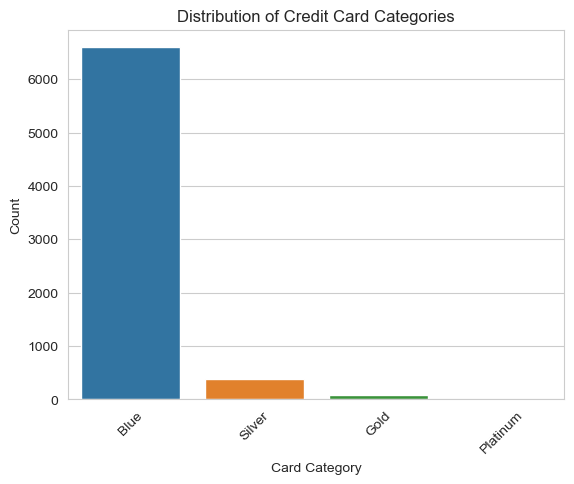

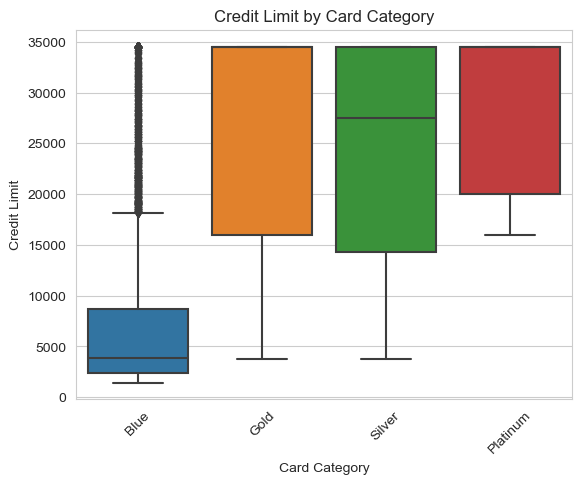

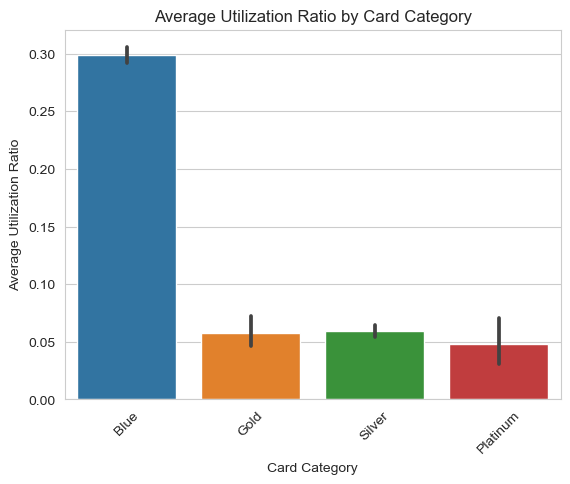

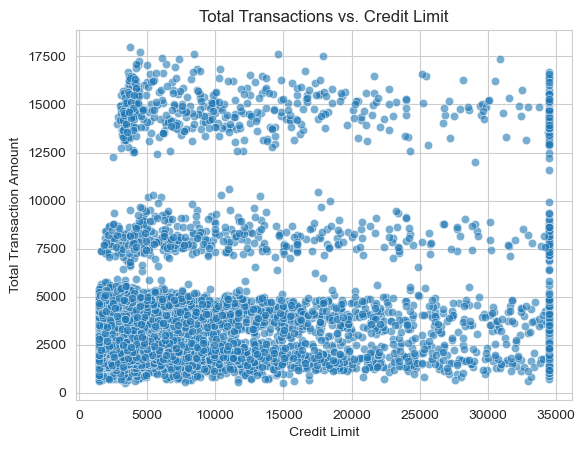

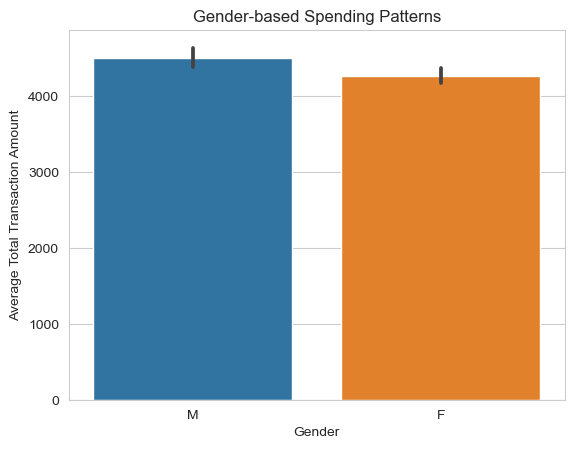

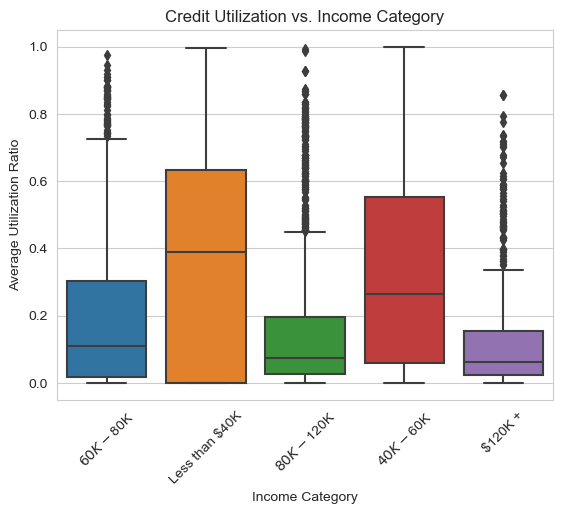

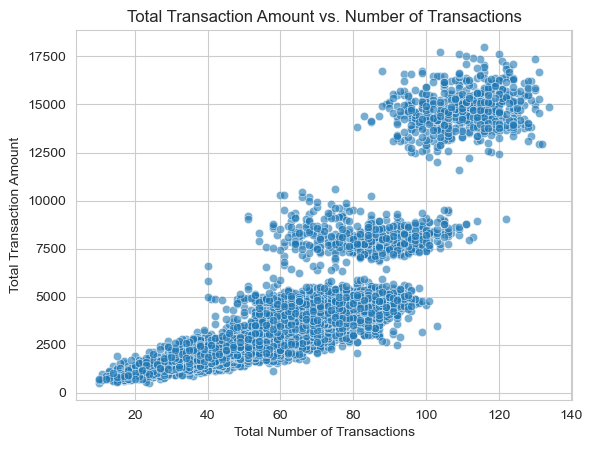

In [47]:
#Distribution of Credit Card Categories
sns.countplot(data=creditcard_dataset, x="Card_Category", order=creditcard_dataset["Card_Category"].value_counts().index)
plt.title("Distribution of Credit Card Categories")
plt.xlabel("Card Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#Credit Limit by Card Category
sns.boxplot(data=creditcard_dataset, x="Card_Category", y="Credit_Limit")
plt.title("Credit Limit by Card Category")
plt.xlabel("Card Category")
plt.ylabel("Credit Limit")
plt.xticks(rotation=45)
plt.show()

#Average Utilization Ratio by Card Category
sns.barplot(data=creditcard_dataset, x="Card_Category", y="Avg_Utilization_Ratio", estimator=lambda x: x.mean())
plt.title("Average Utilization Ratio by Card Category")
plt.xlabel("Card Category")
plt.ylabel("Average Utilization Ratio")
plt.xticks(rotation=45)
plt.show()

#Total Transactions vs. Credit Limit
sns.scatterplot(data=creditcard_dataset, x="Credit_Limit", y="Total_Trans_Amt", alpha=0.6)
plt.title("Total Transactions vs. Credit Limit")
plt.xlabel("Credit Limit")
plt.ylabel("Total Transaction Amount")
plt.show()

#Gender-based Spending Patterns 
sns.barplot(data=creditcard_dataset, x="Gender", y="Total_Trans_Amt", estimator=lambda x: x.mean())
plt.title("Gender-based Spending Patterns")
plt.xlabel("Gender")
plt.ylabel("Average Total Transaction Amount")
plt.show()

#Credit Utilization vs. Income Category
sns.boxplot(data=creditcard_dataset, x="Income_Category", y="Avg_Utilization_Ratio")
plt.title("Credit Utilization vs. Income Category")
plt.xlabel("Income Category")
plt.ylabel("Average Utilization Ratio")
plt.xticks(rotation=45)
plt.show()

#Total Transaction Amount vs. Number of Transactions
sns.scatterplot(data=creditcard_dataset, x="Total_Trans_Ct", y="Total_Trans_Amt", alpha=0.6)
plt.title("Total Transaction Amount vs. Number of Transactions")
plt.xlabel("Total Number of Transactions")
plt.ylabel("Total Transaction Amount")
plt.show()


In [48]:
#Data Transformation for the churn dataset

categorical_columns = creditcard_dataset.select_dtypes(include=['object']).columns

#Transform the categorical columns into numerical values
label_encoders = {}
for column in categorical_columns:
    label_encoder = LabelEncoder()
    creditcard_dataset[column] = label_encoder.fit_transform(creditcard_dataset[column])
    label_encoders[column] = label_encoder

#Put values in a dictionary to compare and see what is the transformed value and original value
for column, encoder in label_encoders.items():
    print(f"\nMappings for {column}:")
    for original_value, encoded_value in zip(encoder.classes_, range(len(encoder.classes_))):
        print(f"{original_value} -> {encoded_value}")


Mappings for Attrition_Flag:
Attrited Customer -> 0
Existing Customer -> 1

Mappings for Gender:
F -> 0
M -> 1

Mappings for Education_Level:
College -> 0
Doctorate -> 1
Graduate -> 2
High School -> 3
Post-Graduate -> 4
Uneducated -> 5

Mappings for Marital_Status:
Divorced -> 0
Married -> 1
Single -> 2

Mappings for Income_Category:
$120K + -> 0
$40K - $60K -> 1
$60K - $80K -> 2
$80K - $120K -> 3
Less than $40K -> 4

Mappings for Card_Category:
Blue -> 0
Gold -> 1
Platinum -> 2
Silver -> 3


In [49]:
creditcard_dataset['Total_Revolving_Bal_Range'] = pd.cut(creditcard_dataset['Total_Revolving_Bal']
                                                  , [-1, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000], labels=[8, 7, 6, 5, 4, 3, 2, 1])

creditcard_dataset['Avg_Open_To_Buy_Range'] = pd.cut(creditcard_dataset['Avg_Open_To_Buy']
                                                  , [-1, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000], labels=[8, 7, 6, 5, 4, 3, 2, 1])


In [50]:
GeneratedCreditScore = []
for i in range(len(creditcard_dataset)):
    score = (creditcard_dataset['Card_Category'][i] * 0.30) + (creditcard_dataset['Total_Revolving_Bal_Range'][i] * 0.30) + (creditcard_dataset['Months_on_book'][i] * 0.15) + (creditcard_dataset['Total_Relationship_Count'][i] * 0.15) + (creditcard_dataset['Avg_Open_To_Buy_Range'][i] * 0.10)
    score = score * 100
    score.astype(int)
    GeneratedCreditScore.append(score)
    
    
creditcard_dataset['Psuedo_Credit_Score'] = GeneratedCreditScore

In [51]:
creditcard_dataset.head(10)

,index,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Income,percentage_expenditure,average_spent_per_transaction,Total_Revolving_Bal_Range,Avg_Open_To_Buy_Range,Psuedo_Credit_Score
0,0,768805383,1,45,1,3,3,1,2,0,...,1144,42,1.625,0.061,70771,1.616481,27.238095,7,6,930.0
1,1,818770008,1,49,0,5,2,2,4,0,...,1291,33,3.714,0.105,7364,17.531233,39.121212,7,7,1030.0
2,2,713982108,1,51,1,3,2,1,3,0,...,1887,20,2.333,0.000,85258,2.213282,94.350000,8,8,920.0
3,4,709106358,1,40,1,3,5,1,2,0,...,816,28,2.500,0.000,63530,1.284433,29.142857,8,8,710.0
4,5,713061558,1,44,1,2,2,1,1,0,...,1088,24,0.846,0.311,53488,2.034101,45.333333,6,8,845.0
5,8,710930508,1,37,1,3,5,2,2,0,...,1350,24,1.182,0.113,70785,1.907184,56.250000,3,5,755.0
6,9,719661558,1,48,1,2,2,2,3,0,...,1441,32,0.882,0.144,114924,1.253872,45.031250,5,7,850.0
7,12,710599683,1,56,1,1,0,2,3,0,...,1539,17,3.250,0.000,87565,1.757552,90.529412,8,6,885.0
8,14,712396908,1,57,0,2,2,1,4,0,...,1570,29,0.611,0.279,10844,14.478052,54.137931,7,8,1085.0
9,16,709967358,1,48,1,4,4,2,3,0,...,1671,27,0.929,0.078,99142,1.685461,61.888889,4,3,780.0


C:\Users\xuanw\AppData\Local\Temp\ipykernel_4064\1151346150.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(creditcard_dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')


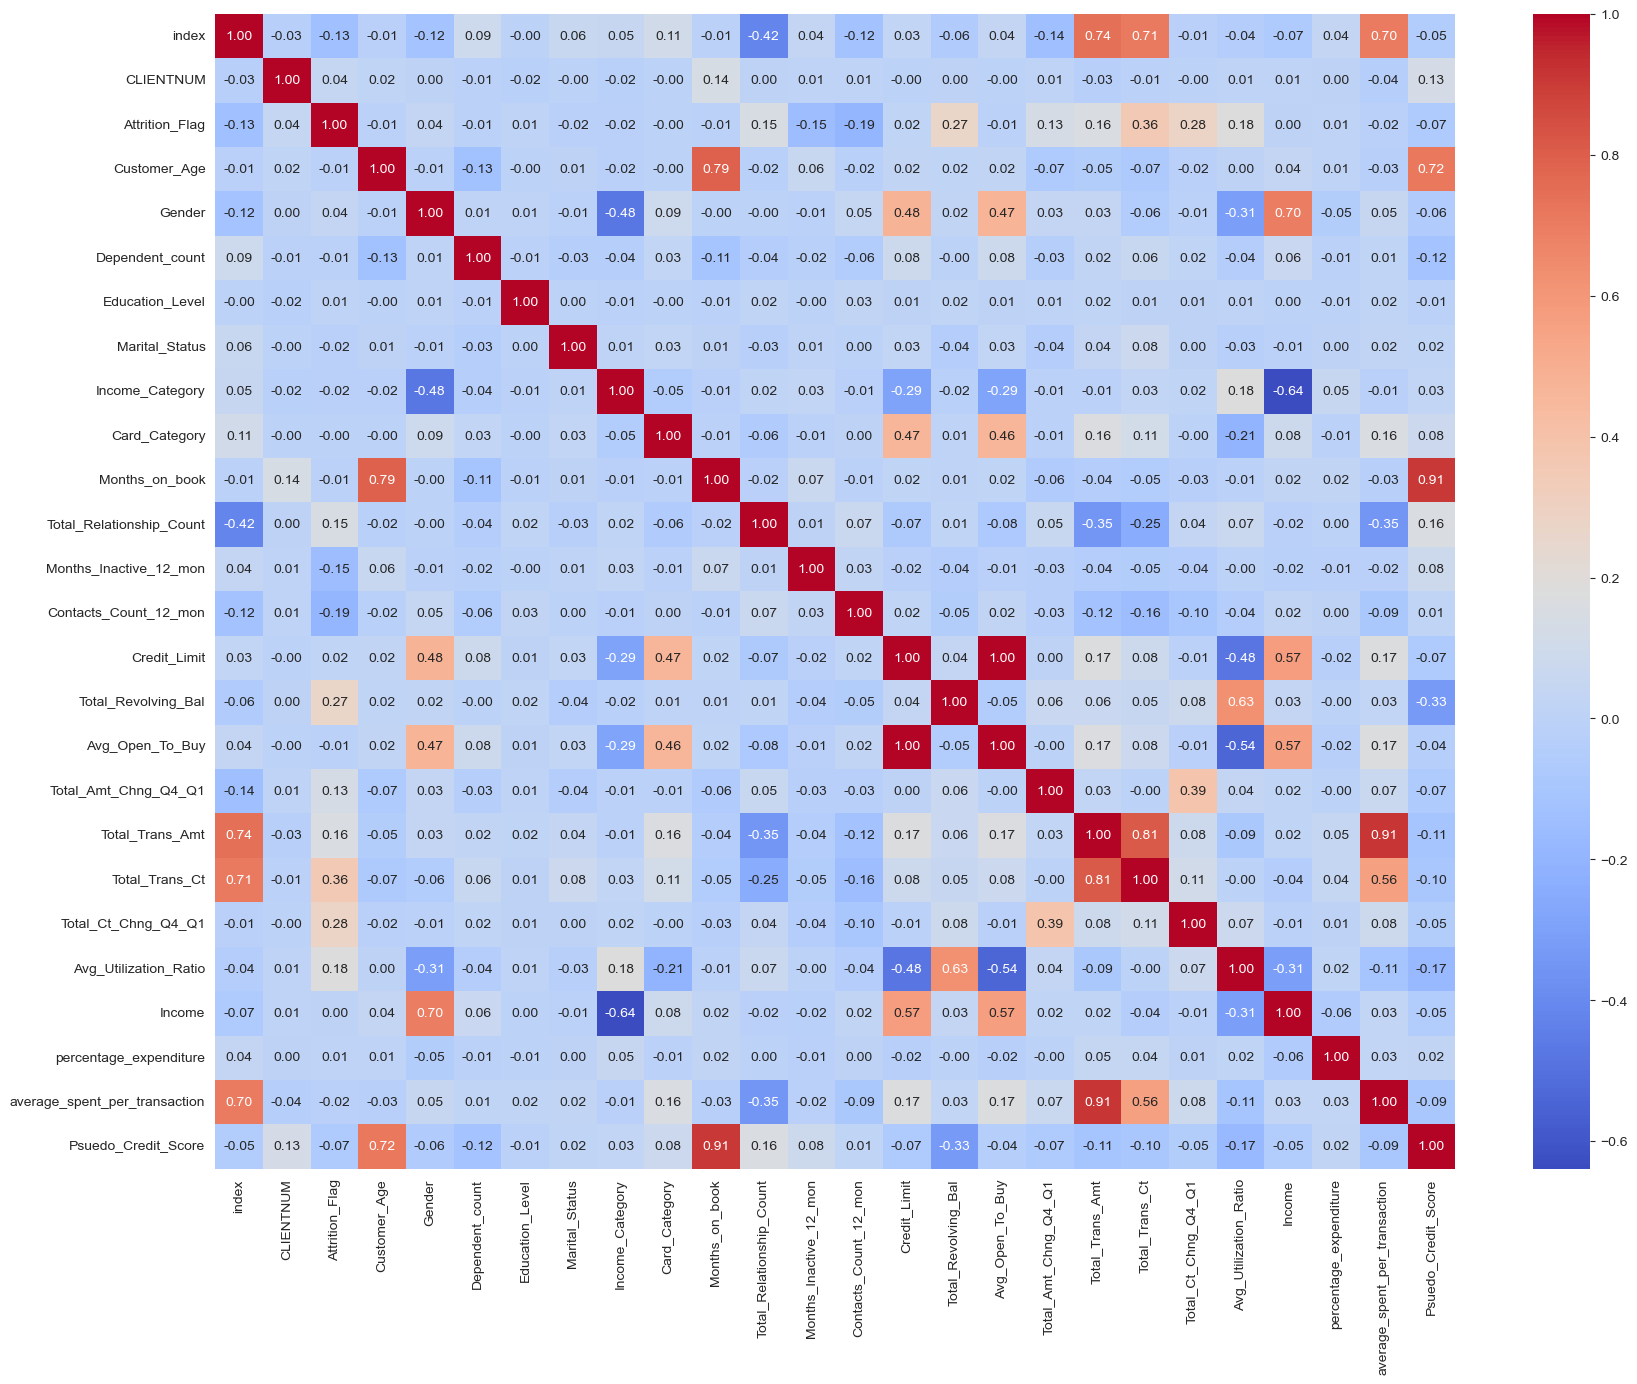

In [52]:
plt.figure(figsize=(20, 15))
sns.heatmap(creditcard_dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

<h1>Base Prediction for Credit Card Attrition</h1>

In [53]:
Xcredit = creditcard_dataset.drop(['Attrition_Flag'], axis=1)
Ycredit = creditcard_dataset['Attrition_Flag']

Xcredit_train, Xcredit_test, Ycredit_train, Ycredit_test = train_test_split(Xcredit, Ycredit, test_size=0.3, random_state=1)

In [54]:
sc = StandardScaler()
Xcredit_train = sc.fit_transform(Xcredit_train)
Xcredit_test = sc.transform(Xcredit_test)

# Models used declared earlier for classification
LogReg = LogisticRegression()
DTClassifier = DecisionTreeClassifier()
RFClassifier = RandomForestClassifier()
SVMClassifier = SVC()
KNNClassifier = KNeighborsClassifier()
GBClassifier = GradientBoostingClassifier()
xgb_creditcard = XGBClassifier()

LogReg.fit(Xcredit_train, Ycredit_train)
Ycredit_log = LogReg.predict(Xcredit_test)
DTClassifier.fit(Xcredit_train, Ycredit_train)
Ycredit_dt = DTClassifier.predict(Xcredit_test)
RFClassifier.fit(Xcredit_train, Ycredit_train)
Ycredit_rf = RFClassifier.predict(Xcredit_test)
SVMClassifier.fit(Xcredit_train, Ycredit_train)
Ycredit_svm = SVMClassifier.predict(Xcredit_test)
KNNClassifier.fit(Xcredit_train, Ycredit_train)
Ycredit_knn = KNNClassifier.predict(Xcredit_test)
GBClassifier.fit(Xcredit_train, Ycredit_train)
Ycredit_gb = GBClassifier.predict(Xcredit_test)
xgb_creditcard.fit(Xcredit_train, Ycredit_train)
Ycredit_xgb = xgb_creditcard.predict(Xcredit_test)


In [55]:
models = {
    "Logistic Regression": Ycredit_log,
    "Decision Tree": Ycredit_dt,
    "Random Forest": Ycredit_rf,
    "SVM": Ycredit_svm,
    "KNN": Ycredit_knn,
    "Gradient Boosting": Ycredit_gb,
    "XGB": Ycredit_xgb
}

for model_name, y_pred in models.items():
    accuracy = accuracy_score(Ycredit_test, y_pred)
    report = classification_report(Ycredit_test, y_pred)
    conf_matrix = confusion_matrix(Ycredit_test, y_pred)

    print(f"\nModel: {model_name}")
    print(f"Validation Accuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", report)
    print("\nConfusion Matrix:\n", conf_matrix)
    print("=" * 50)  # Separator for better readability


#XGBoost Classifier has the highest accuracy score


Model: Logistic Regression
Validation Accuracy: 0.9576

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       331
           1       0.97      0.98      0.97      1794

    accuracy                           0.96      2125
   macro avg       0.92      0.92      0.92      2125
weighted avg       0.96      0.96      0.96      2125


Confusion Matrix:
 [[ 283   48]
 [  42 1752]]

Model: Decision Tree
Validation Accuracy: 0.9689

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       331
           1       0.98      0.98      0.98      1794

    accuracy                           0.97      2125
   macro avg       0.94      0.94      0.94      2125
weighted avg       0.97      0.97      0.97      2125


Confusion Matrix:
 [[ 298   33]
 [  33 1761]]

Model: Random Forest
Validation Accuracy: 0.9784

Classification Report:
               precisi

In [56]:
# # Xcredit_train, Xcredit_test, Ycredit_train, Ycredit_test = train_test_split(Xcredit, Ycredit, test_size=0.3, random_state=1)



# print("CREDIT CARD ATTRITION DATASET")

# # Define your samplers (use None for the Original data)
# samplers = {
#     'Original': None,
#     'Undersampling (70:30)': RandomUnderSampler(sampling_strategy=0.43, random_state=42),
#     'SMOTE (70:30)': SMOTE(sampling_strategy=0.43, random_state=42),
#     'SMOTETomek (70:30)': SMOTETomek(sampling_strategy=0.43, random_state=42),
#     'SMOTEENN (70:30)': SMOTEENN(sampling_strategy=0.43, random_state=42),
#     'Undersampling (50:50)': RandomUnderSampler(sampling_strategy=1.0, random_state=42),
#     'SMOTE (50:50)': SMOTE(sampling_strategy=1.0, random_state=42),
#     'SMOTETomek (50:50)': SMOTETomek(sampling_strategy=1.0, random_state=42),
#     'SMOTEENN (50:50)': SMOTEENN(sampling_strategy=1.0, random_state=42)
# }

# # Define your models
# models = {
#     "Logistic Regression": LogReg,
#     "Decision Tree": DTClassifier,
#     "Random Forest": RFClassifier,
#     "SVM": SVMClassifier,
#     "KNN": KNNClassifier,
#     "Gradient Boosting": GBClassifier,
#     "XGB": xgb_creditcard
# }

# # Loop over each sampler and model combination
# for sampler_name, sampler in samplers.items():
#     print(f"\nResampling Method: {sampler_name}")
#     for model_name, model_instance in models.items():
#         # Build a pipeline: if no sampler, only include the classifier.
#         if sampler is not None:
#             pipe = Pipeline([
#                 ('sampler', sampler),
#                 ('classifier', model_instance)
#             ])
#         else:
#             pipe = Pipeline([
#                 ('classifier', model_instance)
#             ])
        
#         #Scale the data    
#         sc = StandardScaler()
#         Xcredit_train = sc.fit_transform(Xcredit_train)
#         Xcredit_test = sc.transform(Xcredit_test)    
        
#         # Train on the (resampled) training data
#         pipe.fit(Xcredit_train, Ycredit_train)
        
#         # Predict on the test data (test set remains unchanged)
#         y_pred = pipe.predict(Xcredit_test)
#         acc = accuracy_score(Ycredit_test, y_pred)
#         print(f"Model: {model_name} Accuracy: {acc:.3f}")
#         print(classification_report(Ycredit_test, y_pred))
#         print("=" * 50)
        
#         #Credit Card Attrition Dataset
#         #Resampling Method: SMOTETomek (70:30)
#         #XGBoost Classifier has the highest accuracy score

In [57]:
results = []

# Define samplers (use None for the Original data)
samplers = {
    'Undersampling (70:30)': RandomUnderSampler(sampling_strategy=0.43, random_state=42),
    'SMOTE (70:30)': SMOTE(sampling_strategy=0.43, random_state=42),
    'SMOTETomek (70:30)': SMOTETomek(sampling_strategy=0.43, random_state=42),
    'SMOTEENN (70:30)': SMOTEENN(sampling_strategy=0.43, random_state=42),
    # 'Undersampling (50:50)': RandomUnderSampler(sampling_strategy=1.0, random_state=42),
    # 'SMOTE (50:50)': SMOTE(sampling_strategy=1.0, random_state=42),
    # 'SMOTETomek (50:50)': SMOTETomek(sampling_strategy=1.0, random_state=42),
    # 'SMOTEENN (50:50)': SMOTEENN(sampling_strategy=1.0, random_state=42)
}


# Define models
models = {
    "Logistic Regression": LogReg,
    "Decision Tree": DTClassifier,
    "Random Forest": RFClassifier,
    "SVM": SVMClassifier,
    "KNN": KNNClassifier,
    "Gradient Boosting": GBClassifier,
    "XGB": xgb_creditcard
}

# Loop over each sampler and model combination
for sampler_name, sampler in samplers.items():
    for model_name, model_instance in models.items():
        # Build a pipeline: if no sampler, only include classifier
        if sampler is not None:
            pipe = Pipeline([
                ('sampler', sampler),
                ('classifier', model_instance)
            ])
        else:
            pipe = Pipeline([
                ('classifier', model_instance)
            ])
            
        # Scale the data
        sc = StandardScaler()
        Xacc_train = sc.fit_transform(Xcredit_train)
        Xacc_test = sc.transform(Xcredit_test)    
            
        # Train on the (resampled) training data
        pipe.fit(Xcredit_train, Ycredit_train)
        # Predict on the test data (test set remains unchanged)
        y_pred = pipe.predict(Xcredit_test)
        acc = accuracy_score(Ycredit_test, y_pred)
        f1 = f1_score(Ycredit_test, y_pred, average='binary')

        results.append({
            'Resampling': sampler_name,
            'Model': model_name,
            'Accuracy': acc,
            'F1': f1,
            'Pipeline': pipe  # Saving the pipeline might be useful later
        })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# To get the best model based on accuracy
best_pipeline = results_df.sort_values(by=['Accuracy'], ascending=False).head(1)
print("\nBest performing model:")
print(best_pipeline)

# best_df = best_pipeline['Pipeline'].values[0]
# print(best_df)


 #Loan Fraud Dataset
        #SMOTEENN (70/30) 
        #Model: Gradient Boosting Accuracy: 0.841333



Best performing model:
            Resampling              Model  Accuracy        F1  \
19  SMOTETomek (70:30)  Gradient Boosting  0.984471  0.990805   

                                             Pipeline  
19  (SMOTETomek(random_state=42, sampling_strategy...  


In [58]:
#Utilising sampled data for prediction

best_sample = SMOTETomek(sampling_strategy=0.43, random_state=42)
Xcredit_samp, Ycredit_samp = best_sample.fit_resample(Xcredit, Ycredit)

Xcredit_samp_train, Xcredit_samp_test, Ycredit_samp_train, Ycredit_samp_test = train_test_split(Xcredit_samp, Ycredit_samp, test_size=0.3, random_state=1)

Xcredit_samp_train = sc.fit_transform(Xcredit_samp_train)
Xcredit_samp_test = sc.transform(Xcredit_samp_test)

xgb_creditcard.fit(Xcredit_samp_train, Ycredit_samp_train)
Ycredit_samp_xgb = xgb_creditcard.predict(Xcredit_samp_test)

pd.DataFrame({'Actual': Ycredit_samp_test, 'Predicted': Ycredit_samp_xgb})


# #Since XGBoost Classifier has the highest accuracy score, we will use it for the resampled dataset
# XGBClassifier.fit(Xcredit_samp_train, Ycredit_samp_train)




,Actual,Predicted
7352,0,0
7106,0,0
7018,0,0
5084,1,1
4836,1,1
...,...,...
7122,0,0
6931,0,0
4761,1,1
5921,0,0


In [59]:
sampleCredit_accuracy = accuracy_score(Ycredit_samp_test, Ycredit_samp_xgb)
sampleCredit_report = classification_report(Ycredit_samp_test, Ycredit_samp_xgb)
sampleCredit_conf_matrix = confusion_matrix(Ycredit_samp_test, Ycredit_samp_xgb)

print("Validation Accuracy:", sampleCredit_accuracy) 
print("\nClassification Report:\n", sampleCredit_report)
print("\nConfusion Matrix:\n", sampleCredit_conf_matrix)

Validation Accuracy: 0.9906124273580689

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       614
           1       0.99      0.99      0.99      1623

    accuracy                           0.99      2237
   macro avg       0.99      0.99      0.99      2237
weighted avg       0.99      0.99      0.99      2237


Confusion Matrix:
 [[ 602   12]
 [   9 1614]]


<h1>Clustering for Credit Card Attrition</h1>

In [60]:
#selected features based on heatmap

selected_features = [
    'Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Relationship_Count',
    'Credit_Limit', 'Avg_Open_To_Buy', 'Avg_Utilization_Ratio', 'Total_Revolving_Bal'
] #removed

#double check if colum is in the data
missing_cols = [col for col in selected_features if col not in creditcard_dataset.columns]
if missing_cols:
    print(f"Missing columns: {missing_cols}")
else:
    print("All required columns exist!")

# Normalize the selected features
scaler = MinMaxScaler()
scaled_features = creditcard_dataset[selected_features].copy()
scaled_features[selected_features] = scaler.fit_transform(scaled_features[selected_features])




All required columns exist!


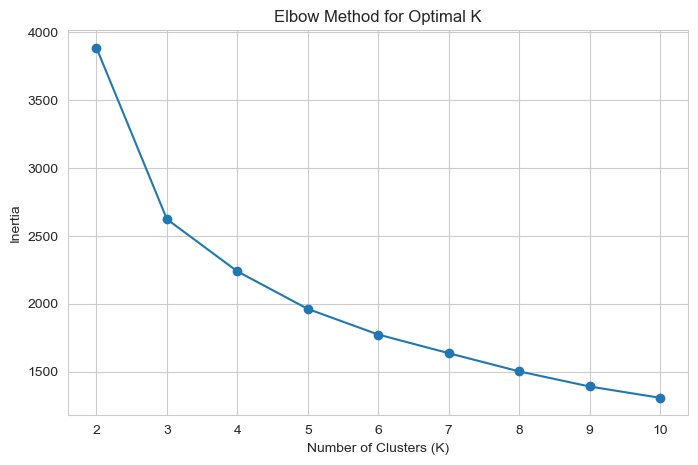

In [61]:
# Apply PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(scaled_features[selected_features])
scaled_features['PCA1'] = pca_transformed[:, 0]
scaled_features['PCA2'] = pca_transformed[:, 1]

# Finding optimal K using Elbow Method
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

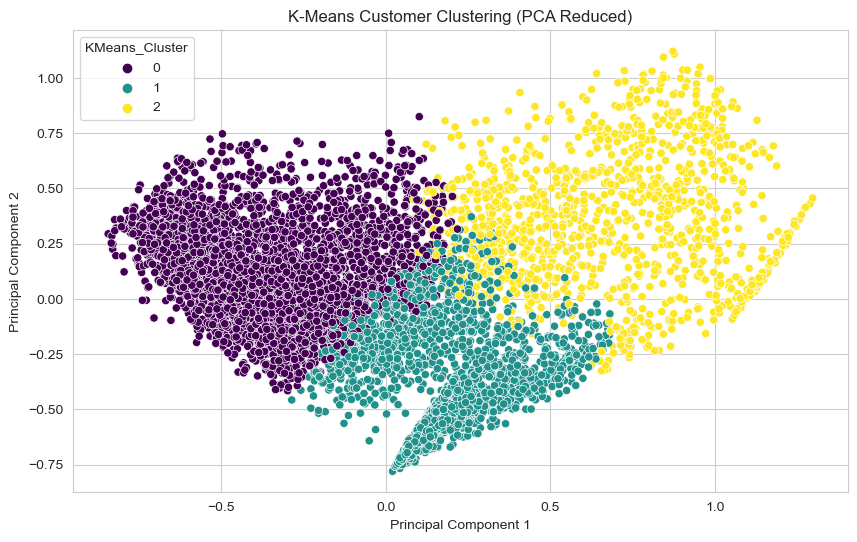

In [62]:
# Apply K-Means Clustering with the optimal K (choose based on elbow curve)
k_optimal = 3  # trying 3 or 4 
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
scaled_features['KMeans_Cluster'] = kmeans.fit_predict(scaled_features[selected_features])

# Visualizing K-Means clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features['PCA1'], y=scaled_features['PCA2'], hue=scaled_features['KMeans_Cluster'], palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Customer Clustering (PCA Reduced)')
plt.show()

In [63]:
# Assign risk levels based on cluster analysis
cluster_labels = scaled_features['KMeans_Cluster'].unique()
risk_mapping = {cluster_labels[0]: 'Low Risk', cluster_labels[1]: 'Medium Risk', cluster_labels[2]: 'High Risk'}  # Dynamically assign risk levels  # Adjust based on analysis
scaled_features['Attrition_Risk'] = scaled_features['KMeans_Cluster'].replace(risk_mapping).astype(str)

# Convert categorical labels to numeric for classification
label_encoder = LabelEncoder()
scaled_features['Attrition_Risk'] = label_encoder.fit_transform(scaled_features['Attrition_Risk'])
print("Unique Attrition Risk Labels:", scaled_features['Attrition_Risk'].unique())

Unique Attrition Risk Labels: [1 2 0]


<h3>DBSCAN</h3>

In [ ]:
# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=30)  # Adjust parameters as needed
scaled_features['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features[selected_features])

# Visualizing DBSCAN clusters using PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features['PCA1'], y=scaled_features['PCA2'], hue=scaled_features['DBSCAN_Cluster'], palette='coolwarm')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Customer Clustering (PCA Reduced)')
plt.show()

<h3>Predict Attrition</h3>

In [ ]:
# Train a predictive model using labeled data
X = scaled_features[selected_features]  # Features
y = scaled_features['Attrition_Risk']  # Target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
clf = None
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'SVM': SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


# Predictions
best_model = max(models.items(), key=lambda x: accuracy_score(y_test, x[1].predict(X_test)))[1]
y_pred = best_model.predict(X_test)


# Evaluate model performance
# Feature Importance Analysis
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.Series(best_model.feature_importances_, index=selected_features)
    plt.figure(figsize=(10, 5))
    feature_importance.sort_values(ascending=False).plot(kind='bar')
    plt.title("Feature Importance in Attrition Prediction")
    plt.xlabel("Features")
    plt.ylabel("Importance Score")
    plt.show()
else:
    print("Feature importance not available for this model.")
# plt.figure(figsize=(10, 5))
# feature_importance.sort_values(ascending=False).plot(kind='bar')
# plt.title("Feature Importance in Attrition Prediction")
# plt.xlabel("Features")
# plt.ylabel("Importance Score")
# plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Predict attrition risk for new customers
# new_customers = X_test.sample(5)
# predictions = clf.predict(new_customers)
# print("Predicted Attrition Risk for New Customers:", predictions)

Training Random Forest...
Random Forest Accuracy: 0.9837685250529288
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       259
           1       0.98      0.97      0.98       440
           2       0.98      0.99      0.99       718

    accuracy                           0.98      1417
   macro avg       0.99      0.98      0.98      1417
weighted avg       0.98      0.98      0.98      1417

Training Logistic Regression...
Logistic Regression Accuracy: 0.9837685250529288
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       259
           1       0.98      0.97      0.98       440
           2       0.98      1.00      0.99       718

    accuracy                           0.98      1417
   macro avg       0.99      0.98      0.98      1417
weighted avg       0.98      0.98      0.98      1417

Training XGBoost...
XGBoost Accuracy: 0.9872971065631616
              precision    reca

In [ ]:
# Calculate attrition risk percentage
def calculate_attrition_percentage(predictions):
    unique, counts = np.unique(predictions, return_counts=True)
    total = len(predictions)
    percentages = {label: (count / total) * 100 for label, count in zip(unique, counts)}
    return percentages

# Testing Example Predictions
print("\nTesting Example Predictions:")
example_customers = X_test.sample(5)
predictions = best_model.predict(example_customers)

# Display example input features and their predictions
example_results = example_customers.copy()
example_results['Predicted_Attrition_Risk'] = predictions
print(example_results)

# Calculate and display attrition risk percentage
attrition_percentage = calculate_attrition_percentage(predictions)
print("\nAttrition Risk Percentage:", attrition_percentage)

# Predict attrition risk for real-world dataset
new_customers = X_test.sample(100)  # Simulating real-world data
real_world_predictions = best_model.predict(new_customers)

# Calculate real-world attrition risk percentage
real_world_attrition_percentage = calculate_attrition_percentage(real_world_predictions)
print("\nReal-World Customer Attrition Risk Distribution:", real_world_attrition_percentage)
print("Testing Example Predictions:")
example_customers = X_test.sample(5)
predictions = best_model.predict(example_customers)

# Display example input features and their predictions
example_results = example_customers.copy()
example_results['Predicted_Attrition_Risk'] = predictions
print(example_results)
new_customers = X_test.sample(5)
predictions = best_model.predict(new_customers)
print("Predicted Attrition Risk for New Customers:", predictions)


Testing Example Predictions:
      Total_Trans_Ct  Total_Trans_Amt  Total_Relationship_Count  Credit_Limit  \
6107        0.516129         0.413154                       0.0      1.000000   
5018        0.483871         0.202631                       0.8      0.311500   
1934        0.153226         0.053989                       0.4      0.511332   
6951        0.782258         0.842608                       0.4      0.301977   
5472        0.604839         0.214927                       0.2      0.021607   

      Avg_Open_To_Buy  Avg_Utilization_Ratio  Total_Revolving_Bal  \
6107         0.967606               0.032032             0.444180   
5018         0.340133               0.000000             0.000000   
1934         0.487932               0.082082             0.599523   
6951         0.264161               0.202202             0.916567   
5472         0.021963               0.647648             0.553039   

      Predicted_Attrition_Risk  
6107                         0  
50

Card Recommendation

In [ ]:
#gLEN
#best_sample = SMOTETomek(sampling_strategy=0.43, random_state=42)
#Xcredit_samp, Ycredit_samp = best_sample.fit_resample(Xcredit, Ycredit)

#Xcredit_samp_train, Xcredit_samp_test, Ycredit_samp_train, Ycredit_samp_test = train_test_split(Xcredit_samp, Ycredit_samp, test_size=0.3, random_state=1)

#Xcredit_samp_train = sc.fit_transform(Xcredit_samp_train)
#Xcredit_samp_test = sc.transform(Xcredit_samp_test)

print(Xcredit_samp.columns)  # Shows feature names
print(Ycredit_samp.name)  # Shows target column names

def feature_importance(X, y, target_column):
    # Encode categorical columns in X (features)
    X_encoded = X.copy()
    categorical_cols = X.select_dtypes(include=['object']).columns
    
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X[col])
        label_encoders[col] = le
    
    # Train RandomForest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_encoded, y)

    # Get feature importance
    importance = model.feature_importances_
    feature_importance = sorted(zip(X_encoded.columns, importance), key=lambda x: x[1], reverse=True)

    # Print feature importance
    print(f"Feature importance for {target_column}:")
    for feature, importance_value in feature_importance:
        print(f"{feature}: {importance_value:.4f}")

# Assuming Xcredit_samp and Ycredit_samp are already defined and preprocessed
# Calculate and print feature importance for Attrition_Flag
print("=== Feature Importance for Attrition_Flag ===")
feature_importance(Xcredit_samp, Ycredit_samp, "Attrition_Flag")

# Calculate and print feature importance for Card_Category
print("\n=== Feature Importance for Card_Category ===")
feature_importance(Xcredit_samp, Ycredit_samp, "Card_Category")



Index(['index', 'CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Income', 'percentage_expenditure', 'average_spent_per_transaction',
       'Total_Revolving_Bal_Range', 'Avg_Open_To_Buy_Range',
       'Psuedo_Credit_Score'],
      dtype='object')
Attrition_Flag
=== Feature Importance for Attrition_Flag ===


ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

<h1>Isolation Forest Anomaly Detection</h1>

In [ ]:
Xiso = creditcard_dataset[['Income_Category', 'percentage_expenditure', 'Total_Amt_Chng_Q4_Q1'
                                , 'Total_Ct_Chng_Q4_Q1', 'average_spent_per_transaction']]

isoForestCredit = IsolationForest(contamination=0.01, random_state=42)

isoForestCredit.fit(Xiso)
creditcard_dataset["Anomaly_Score"] = isoForestCredit.decision_function(Xiso)
creditcard_dataset["Anomaly"] = isoForestCredit.predict(Xiso)

pd.DataFrame({'Income': creditcard_dataset["Income"], 'Percentage Expenditure': creditcard_dataset["percentage_expenditure"],'Anomaly Score': creditcard_dataset["Anomaly_Score"], 'Anomaly': creditcard_dataset["Anomaly"]})

c:\Users\xuanw\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,Income,Percentage Expenditure,Anomaly Score,Anomaly
0,69045,1.656890,0.011384,1
1,3419,37.759579,-0.051139,-1
2,83443,2.261424,-0.091494,-1
3,65885,1.238522,-0.076852,-1
4,48627,2.237440,0.104529,1
...,...,...,...,...
7076,68788,22.644938,0.124413,1
7077,36135,40.392971,0.140473,1
7078,58184,26.598378,0.109442,1
7079,10331,99.612816,0.054234,1


Inliers (Normal) Statistics:
Count: 7010
Average Income: $58683.83
Average percentage_expenditure: 23.28%

Outliers (Anomaly) Statistics:
Count: 71
Average Income: $35312.24
Average percentage_expenditure: 1893.23%


<Figure size 1000x600 with 0 Axes>

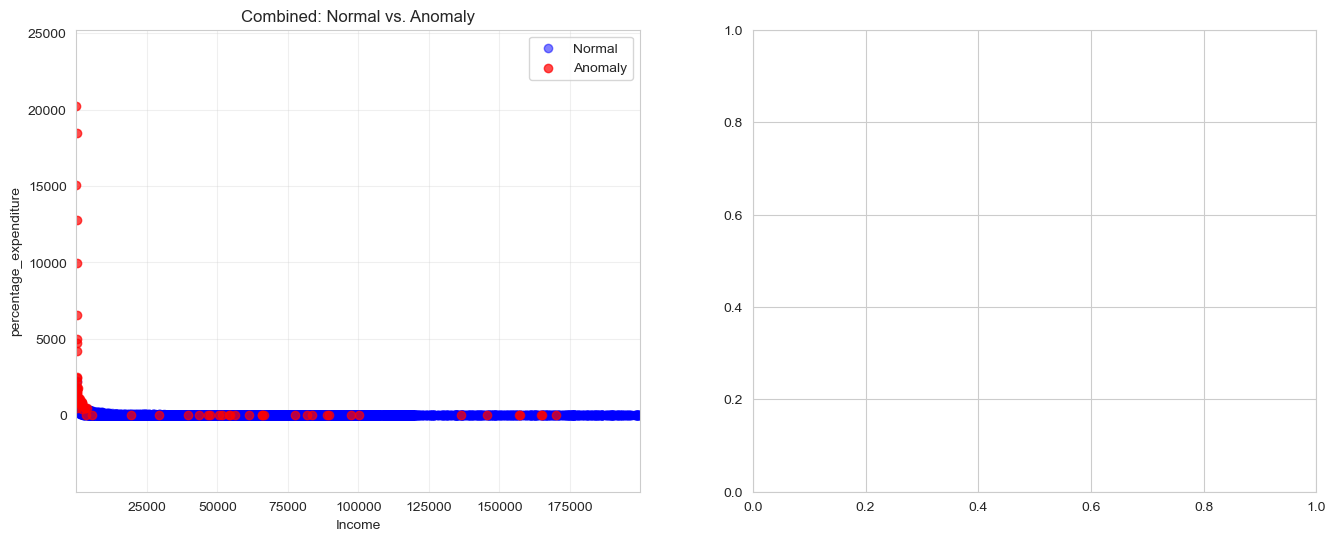

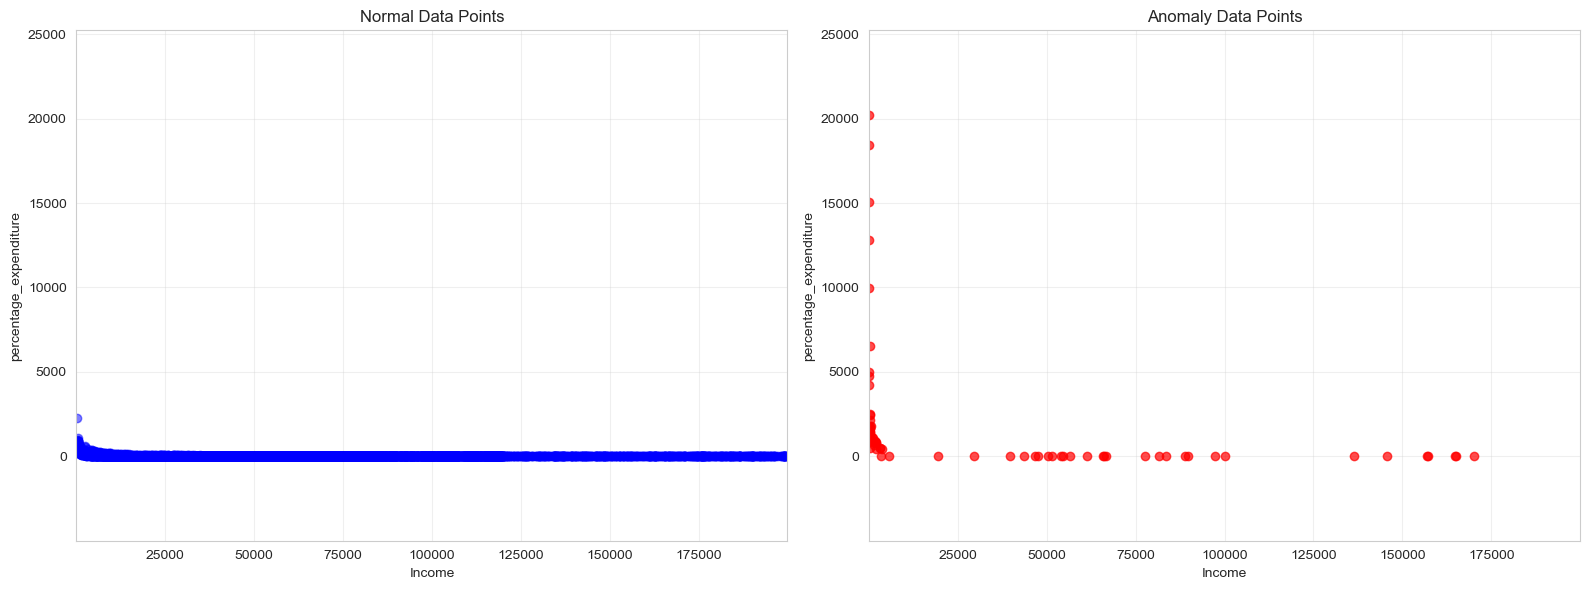

In [ ]:
# Create a scatter plot with colors based on the anomaly detection
plt.figure(figsize=(10, 6))

# Convert the anomaly predictions to a more interpretable format
# In Isolation Forest, -1 indicates outliers and 1 indicates inliers
outliers = (creditcard_dataset["Anomaly"] == -1)

# Choose features to plot
feature1 = 'Income'
feature2 = 'percentage_expenditure'

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Combined view (similar to your original image)
# Plot inliers in blue
ax1.scatter(
    creditcard_dataset.loc[~outliers, feature1],
    creditcard_dataset.loc[~outliers, feature2],
    c='blue', label='Normal', alpha=0.5
)
# Plot outliers in red
ax1.scatter(
    creditcard_dataset.loc[outliers, feature1],
    creditcard_dataset.loc[outliers, feature2],
    c='red', label='Anomaly', alpha=0.7
)
ax1.set_xlabel(feature1)
ax1.set_ylabel(feature2)
ax1.set_title('Combined: Normal vs. Anomaly')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Create separate figure for side-by-side visualization
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 2: Only inliers (normal data)
ax3.scatter(
    creditcard_dataset.loc[~outliers, feature1],
    creditcard_dataset.loc[~outliers, feature2],
    c='blue', alpha=0.5
)
ax3.set_xlabel(feature1)
ax3.set_ylabel(feature2)
ax3.set_title('Normal Data Points')
ax3.grid(True, alpha=0.3)

# Plot 3: Only outliers (anomalies)
ax4.scatter(
    creditcard_dataset.loc[outliers, feature1],
    creditcard_dataset.loc[outliers, feature2],
    c='red', alpha=0.7
)
ax4.set_xlabel(feature1)
ax4.set_ylabel(feature2)
ax4.set_title('Anomaly Data Points')
ax4.grid(True, alpha=0.3)

# Make sure both plots use the same scale for fair comparison
x_min = creditcard_dataset[feature1].min() - 10
x_max = creditcard_dataset[feature1].max() + 10
y_min = creditcard_dataset[feature2].min() - 5000
y_max = creditcard_dataset[feature2].max() + 5000

for ax in [ax1, ax3, ax4]:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

# Add summary statistics as text
anomaly_stats = creditcard_dataset[outliers].describe().round(2)
normal_stats = creditcard_dataset[~outliers].describe().round(2)

# Print summary statistics 
print("Inliers (Normal) Statistics:")
print(f"Count: {sum(~outliers)}")
print(f"Average Income: ${normal_stats.loc['mean', 'Income']}")
print(f"Average percentage_expenditure: {normal_stats.loc['mean', 'percentage_expenditure']:.2f}%")

print("\nOutliers (Anomaly) Statistics:")
print(f"Count: {sum(outliers)}")
print(f"Average Income: ${anomaly_stats.loc['mean', 'Income']}")
print(f"Average percentage_expenditure: {anomaly_stats.loc['mean', 'percentage_expenditure']:.2f}%")


# Show the plots
plt.tight_layout()
plt.show()

Index(['index', 'CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Income', 'percentage_expenditure', 'average_spent_per_transaction',
       'Total_Revolving_Bal_Range', 'Avg_Open_To_Buy_Range',
       'Psuedo_Credit_Score', 'Anomaly_Score', 'Anomaly'],
      dtype='object')
Attrition_Flag
=== Feature Importance for Attrition_Flag ===


ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values